# Analysis Transfer Functions

In [2]:
import sys
#sys.path.append('../shared/')
#import videodisko as vd
# Imports
import numpy as np
import numpy.matlib
import numpy.random

from mpl_toolkits.mplot3d import axes3d 

from matplotlib import pyplot as plt

from scipy import ndimage
from scipy import misc
from scipy import fftpack
from scipy import optimize
import scipy.io
import skimage
import imageio
import colour as c
import math
import csv

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import pandas as pd

import cv2
import time

from datetime import datetime

import os
from fnmatch import fnmatch
import os
from fnmatch import fnmatch
from matplotlib.patches import Rectangle
import re

In [96]:
test1 = c.read_image("/Volumes/T7_Shield/RESIZED/13.1_TRANSFORMED_PQ_FR_HD/20231219_HdM_HDR_2023_VideoDisco_V2_Selection/TRANSFORMED_PQ_BT2020_FR_HD_HdM_HDR_2023_VideoDisco_LogC3_AWG3_TIFF_RGB_16_bit_186351/TRANSFORMED_PQ_BT2020_FR_HD_HdM_HDR_2023_VideoDisco_LogC3_AWG3_TIFF_RGB_16_bit_186351.tif")
test2 = c.read_image("/Volumes/T7_Shield/11_Source_Content/13.1_TRANSFORMED_PQ_FR_HD/20231219_HdM_HDR_2023_VideoDisco_V2_Selection/TRANSFORMED_PQ_BT2020_FR_HD_HdM_HDR_2023_VideoDisco_LogC3_AWG3_TIFF_RGB_16_bit_186351/TRANSFORMED_PQ_BT2020_FR_HD_HdM_HDR_2023_VideoDisco_LogC3_AWG3_TIFF_RGB_16_bit_186351.tif")

/Users/justus/.local/lib/python3.9/site-packages/colour/utilities/verbose.py:262: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


In [100]:
c.models.eotf_ST2084(np.max(test1))

991.70379830206571

In [98]:
np.max(test2)

0.75091898

In [4]:
import os
import pandas as pd
import numpy as np
import csv

# Define the root directory of your file structure
root_directory = '/Volumes/T7_Shield/XX_WATCHFOLDER_PQ_HLG_SUMMARY'

# Initialize an empty list to store the big array
big_array = np.zeros((80,1,36))
big_array_names = []
counter = 0

# Loop through all files and subfolders in the specified directory
for root, dirs, files in os.walk(root_directory):
    for file in files:
        # Check if the file is a CSV file
        if file.endswith('.csv'):
            # Construct the full path to the CSV file
            csv_file_path = os.path.join(root, file)
            print(file)
            
            # Read the CSV file using pandas
            rows = []
            columns = []

            # Open the CSV file and read its content
            with open(csv_file_path, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                
                # Read the first row to get column names
                columns = next(csvreader)
                
                # Read the rest of the rows
                for row in csvreader:
                    rows.append(row)

            #big_array[counter,0] = rows[0]
            #big_array[counter,1] = rows[1]
            #big_array[counter,2] = rows[2]
            big_array[counter,0] = rows[3]
            big_array_names.append(f"{file}")


            
            # Add the values to the big array
            print("hallo")
            counter = counter + 1



SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_B002C026_220414_B09C.00000000.csv
hallo
SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_B002C016_220405_B09C.01513213.csv
hallo
SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_B005C001_220420_B09C.00000000.csv
hallo
SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_F002C012_220412_R07V.01119678.csv
hallo
SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_F002C012_220412_R07V.01123907.csv
hallo
SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_B001C011_220314_R07I.00000000.csv
hallo
SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_A001C012_220402_R088.00259320.csv
hallo
SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_A007C012_220407_R088.01239450.csv
hallo
SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_A003C013_220415_R07B.01235201.csv
hallo
SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_A001C015_220324_R089.00000000.csv
hallo
SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_A001C008_220324_R089.00000000.csv
hallo
SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_A003C004_220407_R08Y.01557645.csv
hallo
SLL_Analysis_TRA

In [5]:
big_array_sum = big_array

In [49]:
big_array

array([[[  7.09008385e-03,   1.33857517e-02,   8.85765329e-03, ...,
           2.00475901e-05,   5.19305044e-06,   0.00000000e+00]],

       [[  4.78152933e-04,   1.92008853e-03,   3.20935284e-03, ...,
           3.21502073e-03,   1.60714859e-03,   5.00450658e-03]],

       [[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           6.44593943e-02,   3.53563850e-03,   9.07841435e-05]],

       ..., 
       [[  1.48957299e-06,   1.73783515e-05,   7.54716981e-05, ...,
           4.05258193e-02,   1.83877855e-02,   4.79846077e-02]],

       [[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           3.46971202e-03,   3.44488580e-03,   9.64647468e-03]],

       [[  9.93049646e-07,   1.53922695e-05,   5.75968794e-05, ...,
           3.69662731e-02,   1.73709209e-02,   4.85382806e-02]]])

In [5]:
np.shape(big_array)

(114, 1, 36)

In [6]:
import numpy as np

# Assuming your 3D array is called 'my_array'
# Replace this with your actual data
my_array = np.random.randint(1, 10, size=(114, 1, 36))

# Set the threshold for the sum in axis 3
threshold_sum = 100
big_array_min = np.zeros((80, 1, 36))
big_array_mid = np.zeros((80, 1, 36))
big_array_max = np.zeros((80, 1, 36))

names_min = []
names_mid = []
names_max = []

# Calculate the sum along the third axis
for i in range(80):
    sums1 = np.sum(big_array_sum[i,0,0:16])
    sums2 = np.sum(big_array_sum[i,0,16:26])
    sums3 = np.sum(big_array_sum[i,0,26:36])
    print(sums1)
    print(sums2)
    print(sums3)

    if sums1 > 0.4:
        big_array_min[i,0,:] = big_array_sum[i,0,:]
        names_min.append(big_array_names[i])
    if sums2 > 0.4:
        big_array_mid[i,0,:] = big_array_sum[i,0,:]
        names_mid.append(big_array_names[i])
    if sums3 > 0.4:
        big_array_max[i,0,:] = big_array_sum[i,0,:]
        names_max.append(big_array_names[i])




2358703.0
2532515.0
3389079.0
4087624.0
3007709.0
1196993.0
307144.0
835759.0
7151497.0
260299.0
5250321.0
2783780.0
1703194.0
5793908.0
797298.0
3196080.0
1630794.0
3467508.0
729647.0
2774795.0
4789958.0
800924.0
6362221.0
1131255.0
894939.0
5971144.0
1428313.0
0.0
2706614.0
5587786.0
1566781.0
4901844.0
1825775.0
88417.0
252050.0
7953933.0
6595519.0
1685077.0
5111.0
5103835.0
2965868.0
224481.0
0.0
2554264.0
5740136.0
3489201.0
3506338.0
1298861.0
40743.0
6631256.0
1622401.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

In [6]:
print(names_max)

['SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_B002C026_220414_B09C.00000000.csv', 'SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_B002C016_220405_B09C.01513213.csv', 'SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_B005C001_220420_B09C.00000000.csv', 'SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_F002C012_220412_R07V.01119678.csv', 'SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_F002C012_220412_R07V.01123907.csv', 'SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_B001C011_220314_R07I.00000000.csv', 'SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_A001C012_220402_R088.00259320.csv', 'SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_A007C012_220407_R088.01239450.csv', 'SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_A003C013_220415_R07B.01235201.csv', 'SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_A001C015_220324_R089.00000000.csv', 'SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_A001C008_220324_R089.00000000.csv', 'SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_A003C004_220407_R08Y.01557645.csv', 'SLL_Analysis_TRANSFORMED_PQ_BT2020_FR_UHD_A005C004

In [7]:
big_array_mid

array([[[  5.87080000e+04,   1.10838000e+05,   7.33440000e+04, ...,
           1.66000000e+02,   4.30000000e+01,   0.00000000e+00]],

       [[  3.96500000e+03,   1.59220000e+04,   2.66130000e+04, ...,
           2.66600000e+04,   1.33270000e+04,   4.14990000e+04]],

       [[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           5.34652000e+05,   2.93260000e+04,   7.53000000e+02]],

       ..., 
       [[  3.00000000e+00,   3.50000000e+01,   1.52000000e+02, ...,
           8.16190000e+04,   3.70330000e+04,   9.66410000e+04]],

       [[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           6.98800000e+03,   6.93800000e+03,   1.94280000e+04]],

       [[  2.00000000e+00,   3.10000000e+01,   1.16000000e+02, ...,
           7.44500000e+04,   3.49850000e+04,   9.77560000e+04]]])

In [8]:
np.shape(filtered_entries)

NameError: name 'filtered_entries' is not defined

In [7]:
big_array_all_values = np.zeros((1,1,36))
for i in range (80):
    for x in range(36):
        big_array_all_values[0,0,x] = big_array_all_values[0,0,x] + big_array[i,0,x]

In [10]:
big_array_all_values_min = np.zeros((1,1,36))
for i in range (114):
    for x in range(36):
        big_array_all_values_min[0,0,x] = big_array_all_values_min[0,0,x] + big_array_min[i,0,x]

In [11]:
big_array_all_values_mid = np.zeros((1,1,36))
for i in range (114):
    for x in range(36):
        big_array_all_values_mid[0,0,x] = big_array_all_values_mid[0,0,x] + big_array_mid[i,0,x]

In [12]:
big_array_all_values_max = np.zeros((1,1,36))
for i in range (114):
    for x in range(36):
        big_array_all_values_max[0,0,x] = big_array_all_values_max[0,0,x] + big_array_max[i,0,x]

In [13]:
big_array_all_values

array([[[   567594.,   1275858.,    936573.,   1540642.,   1641280.,
           2996128.,   2937168.,   5328794.,   4334928.,   5996443.,
           4231566.,   6266974.,   4902809.,   8292578.,   6948940.,
          11910344.,   8686351.,  12848011.,   9701140.,  14209508.,
          12166619.,  18599315.,  13298538.,  19589103.,  14862538.,
          19496580.,  13044506.,  20989225.,  15639044.,  18535263.,
          14103461.,  16250726.,  10763920.,   6673953.,   2804569.,
           6128806.]]])

In [39]:
big_array_sum[0,0,:]

array([  5.87080000e+04,   1.10838000e+05,   7.33440000e+04,
         1.42760000e+05,   1.51531000e+05,   1.86196000e+05,
         1.56086000e+05,   2.72644000e+05,   1.94583000e+05,
         2.40490000e+05,   1.83146000e+05,   2.18083000e+05,
         1.11517000e+05,   1.21463000e+05,   5.91100000e+04,
         7.82040000e+04,   5.52980000e+04,   8.78970000e+04,
         7.86040000e+04,   1.49088000e+05,   1.40950000e+05,
         2.40384000e+05,   2.01761000e+05,   3.93337000e+05,
         3.84985000e+05,   8.00211000e+05,   4.68542000e+05,
         7.68854000e+05,   1.19118400e+06,   8.82641000e+05,
         7.75150000e+04,   3.80000000e+01,   9.60000000e+01,
         1.66000000e+02,   4.30000000e+01,   0.00000000e+00])

In [40]:
for i in range(len(big_array_sum[:,0,0])):
    big_array_sum[i,0,:] = np.divide(big_array_sum[i,0,:],sum(big_array_sum[i,0,:]))

/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_21831/2492145768.py:2: RuntimeWarning: invalid value encountered in true_divide
  big_array_sum[i,0,:] = np.divide(big_array_sum[i,0,:],sum(big_array_sum[i,0,:]))


In [19]:
value_counter_image_hlg_FR = big_array_all_values

In [20]:
value_counter_image_pq_FR = big_array_all_values

In [41]:
value_counter_image_hlg_FR_percentage = np.divide(value_counter_image_hlg_FR,sum(value_counter_image_hlg_FR))
value_counter_image_pq_FR_percentage = np.divide(value_counter_image_pq_FR,sum(value_counter_image_pq_FR))

In [ ]:
print(value_counter_image_pq_FR_percentage)

[ 0.02276176  0.0060698   0.0030349   0.00758725  0.0060698   0.0091047
  0.0060698   0.01213961  0.01062215  0.01517451  0.01062215  0.01972686
  0.01365706  0.02276176  0.01820941  0.02731411  0.02124431  0.03186646
  0.02427921  0.03641882  0.02731411  0.04097117  0.03034901  0.04400607
  0.03338392  0.05007587  0.03490137  0.05311077  0.03793627  0.05462822
  0.03945372  0.05614568  0.04097117  0.05766313  0.04248862  0.03186646]


In [22]:
big_array_auswertung = np.full((30,1,36), "Hello")

In [ ]:
big_array_min[:,:,:]

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.00047815,  0.00192009,  0.00320935, ...,  0.00321502,
          0.00160715,  0.00500451]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       ..., 
       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]])

In [42]:
for i in range(len(big_array_auswertung[:,0,0])):
    for x in range(36):
        diff_hlg = np.subtract(value_counter_image_hlg_FR_percentage[x],big_array_sum[i,0,x])
        diff_pq = np.subtract(value_counter_image_pq_FR_percentage[x],big_array_sum[i,0,x])
        if (diff_hlg >= 0) & (diff_pq >= 0) & (abs(diff_hlg) > (abs(diff_pq))):
            big_array_auswertung[i,0,x] = "PQ"
        if (diff_hlg >= 0) & (diff_pq >= 0) & (abs(diff_pq) > (abs(diff_hlg))):
            big_array_auswertung[i,0,x] = "HLG"
        if (diff_hlg <= 0) & (diff_pq <= 0) & (abs(diff_hlg) > (abs(diff_pq))):
            big_array_auswertung[i,0,x] = "PQ"
        if (diff_hlg <= 0) & (diff_pq <= 0) & (abs(diff_pq) > (abs(diff_hlg))):
            big_array_auswertung[i,0,x] = "HLG"

        if (diff_hlg >= 0) & (diff_pq <= 0):
            big_array_auswertung[i,0,x] = "HLG"
        if (diff_hlg <= 0) & (diff_pq >= 0):
            big_array_auswertung[i,0,x] = "PQ"


In [ ]:
big_array_auswertung_min = np.full((114,1,36), "Hello")
for i in range(len(big_array_auswertung_min[:,0,0])):
    for x in range(36):
        diff_hlg = np.subtract(value_counter_image_hlg_FR_percentage[x],big_array_min[i,0,x])
        diff_pq = np.subtract(value_counter_image_pq_FR_percentage[x],big_array_min[i,0,x])
        if (diff_hlg != value_counter_image_hlg_FR_percentage[x]) & (diff_pq != value_counter_image_pq_FR_percentage[x]):
            if (diff_hlg >= 0) & (diff_pq >= 0) & (abs(diff_hlg) > (abs(diff_pq))):
                big_array_auswertung_min[i,0,x] = "PQ"
            if (diff_hlg >= 0) & (diff_pq >= 0) & (abs(diff_pq) > (abs(diff_hlg))):
                big_array_auswertung_min[i,0,x] = "HLG"
            if (diff_hlg <= 0) & (diff_pq <= 0) & (abs(diff_hlg) > (abs(diff_pq))):
                big_array_auswertung_min[i,0,x] = "PQ"
            if (diff_hlg <= 0) & (diff_pq <= 0) & (abs(diff_pq) > (abs(diff_hlg))):
                big_array_auswertung_min[i,0,x] = "HLG"

            if (diff_hlg >= 0) & (diff_pq <= 0):
                big_array_auswertung_min[i,0,x] = "HLG"
            if (diff_hlg <= 0) & (diff_pq >= 0):
                big_array_auswertung_min[i,0,x] = "PQ"


In [ ]:
big_array_auswertung_mid = np.full((114,1,36), "Hello")
for i in range(len(big_array_auswertung_mid[:,0,0])):
    for x in range(36):
        diff_hlg = np.subtract(value_counter_image_hlg_FR_percentage[x],big_array_mid[i,0,x])
        diff_pq = np.subtract(value_counter_image_pq_FR_percentage[x],big_array_mid[i,0,x])
        if (diff_hlg != value_counter_image_hlg_FR_percentage[x]) & (diff_pq != value_counter_image_pq_FR_percentage[x]):
            if (diff_hlg >= 0) & (diff_pq >= 0) & (abs(diff_hlg) > (abs(diff_pq))):
                big_array_auswertung_mid[i,0,x] = "PQ"
            if (diff_hlg >= 0) & (diff_pq >= 0) & (abs(diff_pq) > (abs(diff_hlg))):
                big_array_auswertung_mid[i,0,x] = "HLG"
            if (diff_hlg <= 0) & (diff_pq <= 0) & (abs(diff_hlg) > (abs(diff_pq))):
                big_array_auswertung_mid[i,0,x] = "PQ"
            if (diff_hlg <= 0) & (diff_pq <= 0) & (abs(diff_pq) > (abs(diff_hlg))):
                big_array_auswertung_mid[i,0,x] = "HLG"

            if (diff_hlg >= 0) & (diff_pq <= 0):
                big_array_auswertung_mid[i,0,x] = "HLG"
            if (diff_hlg <= 0) & (diff_pq >= 0):
                big_array_auswertung_mid[i,0,x] = "PQ"

In [ ]:
big_array_auswertung_max = np.full((114,1,36), "Hello")
for i in range(len(big_array_auswertung_max[:,0,0])):
    for x in range(36):
        diff_hlg = np.subtract(value_counter_image_hlg_FR_percentage[x],big_array_max[i,0,x])
        diff_pq = np.subtract(value_counter_image_pq_FR_percentage[x],big_array_max[i,0,x])
        if (diff_hlg != value_counter_image_hlg_FR_percentage[x]) & (diff_pq != value_counter_image_pq_FR_percentage[x]):
            if (diff_hlg >= 0) & (diff_pq >= 0) & (abs(diff_hlg) > (abs(diff_pq))):
                big_array_auswertung_max[i,0,x] = "PQ"
            if (diff_hlg >= 0) & (diff_pq >= 0) & (abs(diff_pq) > (abs(diff_hlg))):
                big_array_auswertung_max[i,0,x] = "HLG"
            if (diff_hlg <= 0) & (diff_pq <= 0) & (abs(diff_hlg) > (abs(diff_pq))):
                big_array_auswertung_max[i,0,x] = "PQ"
            if (diff_hlg <= 0) & (diff_pq <= 0) & (abs(diff_pq) > (abs(diff_hlg))):
                big_array_auswertung_max[i,0,x] = "HLG"

            if (diff_hlg >= 0) & (diff_pq <= 0):
                big_array_auswertung_max[i,0,x] = "HLG"
            if (diff_hlg <= 0) & (diff_pq >= 0):
                big_array_auswertung_max[i,0,x] = "PQ"

In [ ]:
big_array_min[8,:,:]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [20]:
big_array_auswertung_min[:,:,:]

NameError: name 'big_array_auswertung_min' is not defined

In [ ]:
print(np.shape(big_array_names))

(114,)


In [ ]:
import csv

def write_to_csv(file_path, array1, array2):
    with open(file_path, mode='w', newline='') as file:
        writer = csv.writer(file)

        # Iterate through both arrays and write to CSV

        for i in range(len(big_array_auswertung[:,0,0])): 
                row_data = [array1[i]] + [array2[i,0,:]]
                writer.writerow(row_data)

write_to_csv('/Volumes/T7_Shield/71_AUSWERTUNG_SCENE_LINEAR/output.csv', big_array_names, big_array_auswertung)


In [43]:
hlg_pq_counter = np.zeros((1,36,2))

In [44]:
for i in range(114):
    for x in range(36):
        if big_array_auswertung[i,0,x] == "PQ":
            hlg_pq_counter[0,x,0] = hlg_pq_counter[0,x,0] + 1
        if big_array_auswertung[i,0,x] == "HLG":
            hlg_pq_counter[0,x,1] = hlg_pq_counter[0,x,1] + 1

In [ ]:
hlg_pq_counter_min = np.zeros((1,36,2))
hlg_pq_counter_mid = np.zeros((1,36,2))
hlg_pq_counter_max = np.zeros((1,36,2))

for i in range(114):
    for x in range(36):
        if big_array_auswertung_min[i,0,x] == "PQ":
            hlg_pq_counter_min[0,x,0] = hlg_pq_counter_min[0,x,0] + 1
        if big_array_auswertung_min[i,0,x] == "HLG":
            hlg_pq_counter_min[0,x,1] = hlg_pq_counter_min[0,x,1] + 1
        if big_array_auswertung_min[i,0,x] == "Hello":
            hlg_pq_counter_min[0,x,1] = hlg_pq_counter_min[0,x,1] + 0  

for i in range(114):
    for x in range(36):
        if big_array_auswertung_mid[i,0,x] == "PQ":
            hlg_pq_counter_mid[0,x,0] = hlg_pq_counter_mid[0,x,0] + 1
        if big_array_auswertung_mid[i,0,x] == "HLG":
            hlg_pq_counter_mid[0,x,1] = hlg_pq_counter_mid[0,x,1] + 1
        if big_array_auswertung_mid[i,0,x] == "Hello":
            hlg_pq_counter_min[0,x,1] = hlg_pq_counter_min[0,x,1] + 0  

for i in range(114):
    for x in range(36):
        if big_array_auswertung_max[i,0,x] == "PQ":
            hlg_pq_counter_max[0,x,0] = hlg_pq_counter_max[0,x,0] + 1
        if big_array_auswertung_max[i,0,x] == "HLG":
            hlg_pq_counter_max[0,x,1] = hlg_pq_counter_max[0,x,1] + 1
        if big_array_auswertung_mid[i,0,x] == "Hello":
            hlg_pq_counter_min[0,x,1] = hlg_pq_counter_min[0,x,1] + 0  

In [45]:
hlg_pq_counter_percentage = np.zeros((1,36,2))
for i in range(36):
    hlg_pq_counter_percentage[0,i,0] = np.divide(hlg_pq_counter[0,i,0],114)
    hlg_pq_counter_percentage[0,i,1] = np.divide(hlg_pq_counter[0,i,1],114)

In [ ]:
np.shape(names_min)

(21,)

In [ ]:
np.shape(names_mid)

(61,)

In [ ]:
np.shape(names_max)

(48,)

In [ ]:
hlg_pq_counter_percentage_min = np.zeros((1,36,2))
for i in range(36):
    hlg_pq_counter_percentage_min[0,i,0] = np.divide(hlg_pq_counter_min[0,i,0],21)
    hlg_pq_counter_percentage_min[0,i,1] = np.divide(hlg_pq_counter_min[0,i,1],21)

hlg_pq_counter_percentage_mid = np.zeros((1,36,2))
for i in range(36):
    hlg_pq_counter_percentage_mid[0,i,0] = np.divide(hlg_pq_counter_mid[0,i,0],61)
    hlg_pq_counter_percentage_mid[0,i,1] = np.divide(hlg_pq_counter_mid[0,i,1],61)

hlg_pq_counter_percentage_max = np.zeros((1,36,2))
for i in range(36):
    hlg_pq_counter_percentage_max[0,i,0] = np.divide(hlg_pq_counter_max[0,i,0],48)
    hlg_pq_counter_percentage_max[0,i,1] = np.divide(hlg_pq_counter_max[0,i,1],48)

In [46]:
xs = np.linspace(0,35,36)
plt.plot(xs,hlg_pq_counter_percentage_min[0,:,0])


NameError: name 'hlg_pq_counter_percentage_min' is not defined

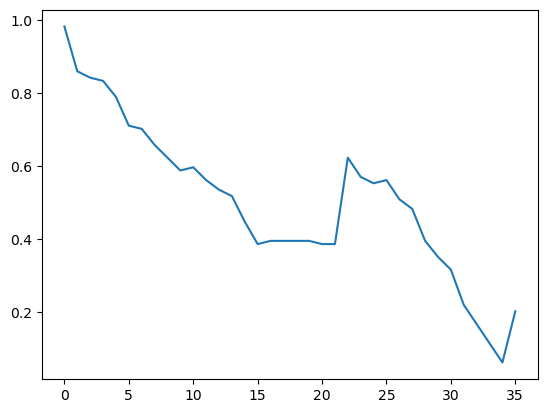

In [ ]:
plt.plot(xs,hlg_pq_counter_percentage[0,:,1])

[ 0.98245614  0.85964912  0.84210526  0.83333333  0.78947368  0.71052632
  0.70175439  0.65789474  0.62280702  0.5877193   0.59649123  0.56140351
  0.53508772  0.51754386  0.44736842  0.38596491  0.39473684  0.39473684
  0.39473684  0.39473684  0.38596491  0.38596491  0.62280702  0.57017544
  0.55263158  0.56140351  0.50877193  0.48245614  0.39473684  0.35087719
  0.31578947  0.21929825  0.16666667  0.11403509  0.06140351  0.20175439]


/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_66505/1716764085.py:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axL1.step(y_pos/2 + 1.25, np.divide(value_counter_image_hlg_FR,sum(value_counter_image_hlg_FR)), 'k',where="mid",linewidth=2,color="darkturquoise", label="HLG EOTF 10 bit Narrow Range",alpha=1)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_66505/1716764085.py:69: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axL1.step(y_pos/2 + 1.25, np.divide(value_counter_image_pq_FR,sum(value_counter_image_pq_FR)), 'k',where="mid",linewidth=2,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=1)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_66505/1716764085.py:143: UserWarning: color is r

Text(19.16, 0.01, '1000 cd/m2 Limit BT.2100 Ref. Display')

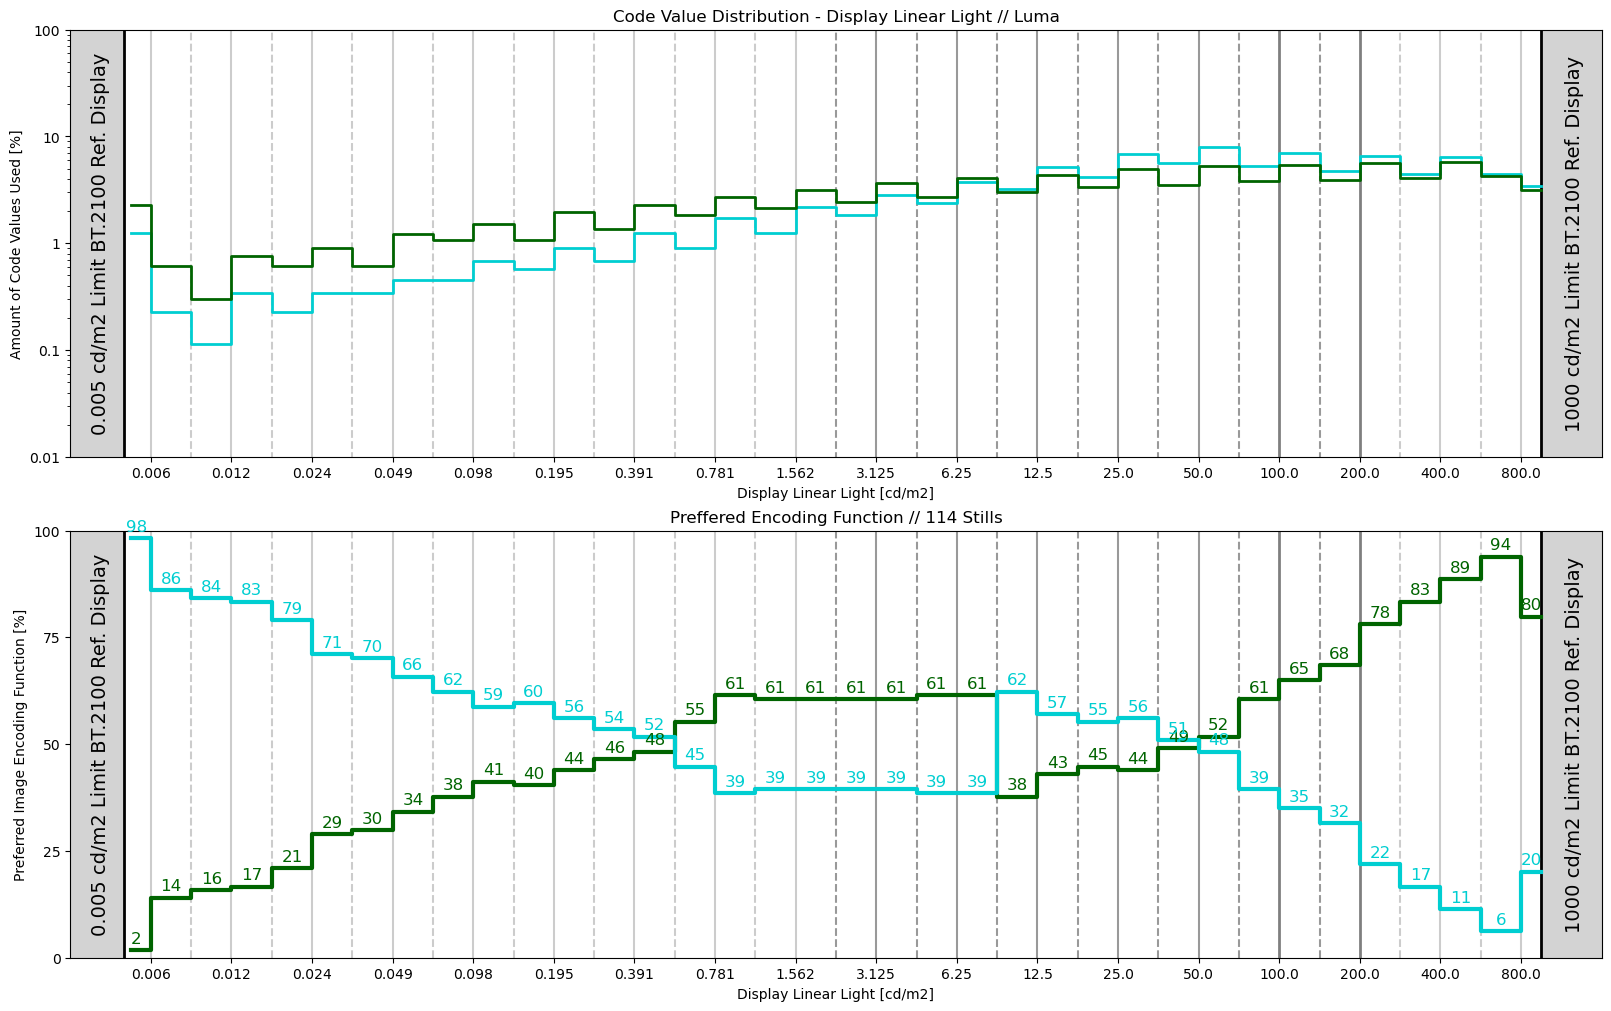

In [47]:
figR, (axL1, axL) = plt.subplots(2, 1, figsize=(16, 10), constrained_layout=True, gridspec_kw={'height_ratios': [1 , 1]})


value_counter_image_hlg_FR = np.zeros((36))
value_counter_image_pq_FR = np.zeros((36))

axL1.set_ylabel('Amount of Code Values Used [%]')
axL1.set_xlabel('Display Linear Light [cd/m2]')

#x1 = np.linspace(0.000000000000001,1,1000000)

axL1.vlines(0.5+2/3,0,10000000,color='black', linestyle="solid", alpha=1,linewidth=2)
axL1.vlines(1.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(2.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(3.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(4.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(5.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(6.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(7.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(8.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(9.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(10.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(11.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(12.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(13.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(14.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(15.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL1.vlines(16.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL1.vlines(17.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(18.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(18.5+0.25,0,10000000,color='black', linestyle="solid", alpha=1, linewidth=2)



axL1.vlines(2,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(3,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(4,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(5,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(6,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(7,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(8,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(9,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(10,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(11,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(12,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(13,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(14,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(15,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(16,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(17,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(18,0,10000000,color='gray', linestyle="dashed", alpha=0.4)


value_counter_image_hlg_FR = split_array_to_stops(c.models.eotf_HLG_BT2100(legal2full(np.linspace(64,940,877)),0,1000))
value_counter_image_pq_FR = split_array_to_stops(c.models.eotf_ST2084(legal2full(np.linspace(64,722,659))))


bars = ('A', 'B', 'C', 'D', 'E',
    'F','G', 'H', 'I', 'J', 
    'K','L','M', 'N', 'O', 
    'P', 'Q','R','A', 'B', 
    'C', 'D', 'E','F','G', 
    'H', 'I', 'J', 'K','L',
    'M', 'N', 'O', 'P', 'Q' , 'R')

y_pos = np.arange(len(bars))

axL1.step(y_pos/2 + 1.25, np.divide(value_counter_image_hlg_FR,sum(value_counter_image_hlg_FR)), 'k',where="mid",linewidth=2,color="darkturquoise", label="HLG EOTF 10 bit Narrow Range",alpha=1)
axL1.step(y_pos/2 + 1.25, np.divide(value_counter_image_pq_FR,sum(value_counter_image_pq_FR)), 'k',where="mid",linewidth=2,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=1)

y_pos_between = np.round([200 * 2 ** i for i in range(-15,3)],3)
y_pos_neu = np.linspace(0,17,18)

axL1.set_xticks(y_pos_neu+1.5, y_pos_between)

axL1.set_xlim(0.5,19.5)
axL1.set_yscale("log")
axL1.set_ylim(0.0001,1)
axL1.set_yticks([0.0001,0.001,0.01,0.1,1],[0.01,0.1,1,10,100])


axL.set_ylabel('Preferred Image Encoding Function [%]')
axL.set_xlabel('Display Linear Light [cd/m2]')

#x1 = np.linspace(0.000000000000001,1,1000000)

axL.vlines(0.5+2/3,0,10000000,color='black', linestyle="solid", alpha=1,linewidth=2)
axL.vlines(1.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(2.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(3.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(4.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(5.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(6.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(7.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(8.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(9.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(10.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(11.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(12.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(13.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(14.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(15.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL.vlines(16.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL.vlines(17.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(18.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(18.5+0.25,0,10000000,color='black', linestyle="solid", alpha=1, linewidth=2)

axL.vlines(2,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(3,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(4,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(5,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(6,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(7,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(8,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(9,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(10,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(11,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(12,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(13,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(14,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(15,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(16,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(17,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(18,0,10000000,color='gray', linestyle="dashed", alpha=0.4)


# value_counter_image_hlg_FR = split_array_to_stops(c.models.eotf_HLG_BT2100(legal2full(np.linspace(64,940,877)),0,1000))
# value_counter_image_pq_FR = split_array_to_stops(c.models.eotf_ST2084(legal2full(np.linspace(64,940,877))))


bars = ('A', 'B', 'C', 'D', 'E',
    'F','G', 'H', 'I', 'J', 
    'K','L','M', 'N', 'O', 
    'P', 'Q','R','A', 'B', 
    'C', 'D', 'E','F','G', 
    'H', 'I', 'J', 'K','L',
    'M', 'N', 'O', 'P', 'Q' , 'R')

y_pos = np.arange(len(bars))

# axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_hlg_FR,sum(value_counter_image_hlg_FR)), 'k',where="mid",linewidth=1,color="darkturquoise", label="HLG EOTF 10 bit Narrow Range",alpha=0.7)
# axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_pq_FR,sum(value_counter_image_pq_FR)), 'k',where="mid",linewidth=1,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=0.7)
axL.step(y_pos/2 + 1.25, hlg_pq_counter_percentage[0,:,0], 'k',where="mid",linewidth=3,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=1)
axL.step(y_pos/2 + 1.25, hlg_pq_counter_percentage[0,:,1], 'k',where="mid",linewidth=3,color="darkturquoise", label="HLG EOTF 10 bit Narrow Range",alpha=1)

counter1 = 1
counter2 = 1
for x, y in zip(y_pos[1:35]/2 + 1.25, hlg_pq_counter_percentage[0,1:35,0]):
    axL.annotate(int(np.round(hlg_pq_counter_percentage[0,counter1,0]*100,0)), (x, y), textcoords="offset points", xytext=(0,5), ha='center',fontsize=12,color="darkgreen")
    counter1 = counter1 + 1

axL.annotate(int(np.round(hlg_pq_counter_percentage[0,0,0]*100,0)), (y_pos[0:1]/2 + 1.25, hlg_pq_counter_percentage[0,0:1,0]), textcoords="offset points", xytext=(4,5), ha='center',fontsize=12,color="darkgreen")
axL.annotate(int(np.round(hlg_pq_counter_percentage[0,35,0]*100,0)), (y_pos[35:36]/2 + 1.25, hlg_pq_counter_percentage[0,35:36,0]), textcoords="offset points", xytext=(-7,5), ha='center',fontsize=12,color="darkgreen")


for x, y in zip(y_pos[1:35]/2 + 1.25, hlg_pq_counter_percentage[0,1:35,1]):
    axL.annotate(int(np.round(hlg_pq_counter_percentage[0,counter2,1]*100,0)), (x, y), textcoords="offset points", xytext=(0,5), ha='center',fontsize=12,color="darkturquoise")
    counter2 = counter2 + 1

axL.annotate(int(np.round(hlg_pq_counter_percentage[0,0,1]*100,0)), (y_pos[0:1]/2 + 1.25, hlg_pq_counter_percentage[0,0:1,1]), textcoords="offset points", xytext=(4,5), ha='center',fontsize=12,color="darkturquoise")
axL.annotate(int(np.round(hlg_pq_counter_percentage[0,35,1]*100,0)), (y_pos[35:36]/2 + 1.25, hlg_pq_counter_percentage[0,35:36,1]), textcoords="offset points", xytext=(-7,5), ha='center',fontsize=12,color="darkturquoise")


# for x, y in zip(y_pos/2 + 1.25, hlg_pq_counter_percentage[0,:,1]):
#     axL.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,0), ha='center')

print(hlg_pq_counter_percentage[0,:,1])

y_pos_between = np.round([200 * 2 ** i for i in range(-15,3)],3)
y_pos_neu = np.linspace(0,17,18)

axL.set_xticks(y_pos_neu+1.5, y_pos_between)

axL.set_xlim(0.5,19.5)
axL.set_ylim(0,1)
axL.set_yticks([0,0.25,0.5,0.75,1],[0,25,50,75,100])


axL.add_patch(Rectangle((0.5+2/3, 0), -100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))
axL1.add_patch(Rectangle((0.5+2/3, 0), -100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))
axL.add_patch(Rectangle((18.75, 0), 100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))
axL1.add_patch(Rectangle((18.75, 0), 100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))

axL1.set_title("Code Value Distribution - Display Linear Light // Luma")
axL.set_title("Preffered Encoding Function // 114 Stills")

axL.text(0.88,0.5,"0.005 cd/m2 Limit BT.2100 Ref. Display",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=14)
axL1.text(0.88,0.01,"0.005 cd/m2 Limit BT.2100 Ref. Display",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=14)
axL.text(19.16,0.5,"1000 cd/m2 Limit BT.2100 Ref. Display",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=14)
axL1.text(19.16,0.01,"1000 cd/m2 Limit BT.2100 Ref. Display",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=14)


[ 0.98245614  0.85964912  0.84210526  0.83333333  0.78947368  0.71052632
  0.70175439  0.65789474  0.62280702  0.5877193   0.59649123  0.56140351
  0.53508772  0.51754386  0.44736842  0.38596491  0.39473684  0.39473684
  0.39473684  0.39473684  0.38596491  0.38596491  0.62280702  0.57017544
  0.55263158  0.56140351  0.50877193  0.48245614  0.39473684  0.35087719
  0.31578947  0.21929825  0.16666667  0.11403509  0.06140351  0.20175439]
[ 0.57142857  0.28571429  0.23809524  0.28571429  0.28571429  0.14285714
  0.14285714  0.04761905  0.          0.          0.          0.
  0.04761905  0.04761905  0.          0.          0.0952381   0.14285714
  0.19047619  0.28571429  0.42857143  0.71428571  0.19047619  0.14285714
  0.0952381   0.04761905  0.04761905  0.04761905  0.          0.
  0.          0.          0.          0.          0.04761905  0.14285714]


/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_74739/780285504.py:70: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axL.step(y_pos/2 + 1.25, big_array_all_values_min[0,0,:]/sum(big_array_all_values_min[0,0,:]), 'k',where="mid",linewidth=3,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=1)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_74739/780285504.py:160: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axL1.step(y_pos/2 + 1.25, hlg_pq_counter_percentage_min[0,:,0], 'k',where="mid",linewidth=3,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=1)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_74739/780285504.py:161: UserWarning: color is redundantly defined by the 'color' keywor

Text(19.16, 0.5, '1000 cd/m2 Limit BT.2100 Ref. Display')

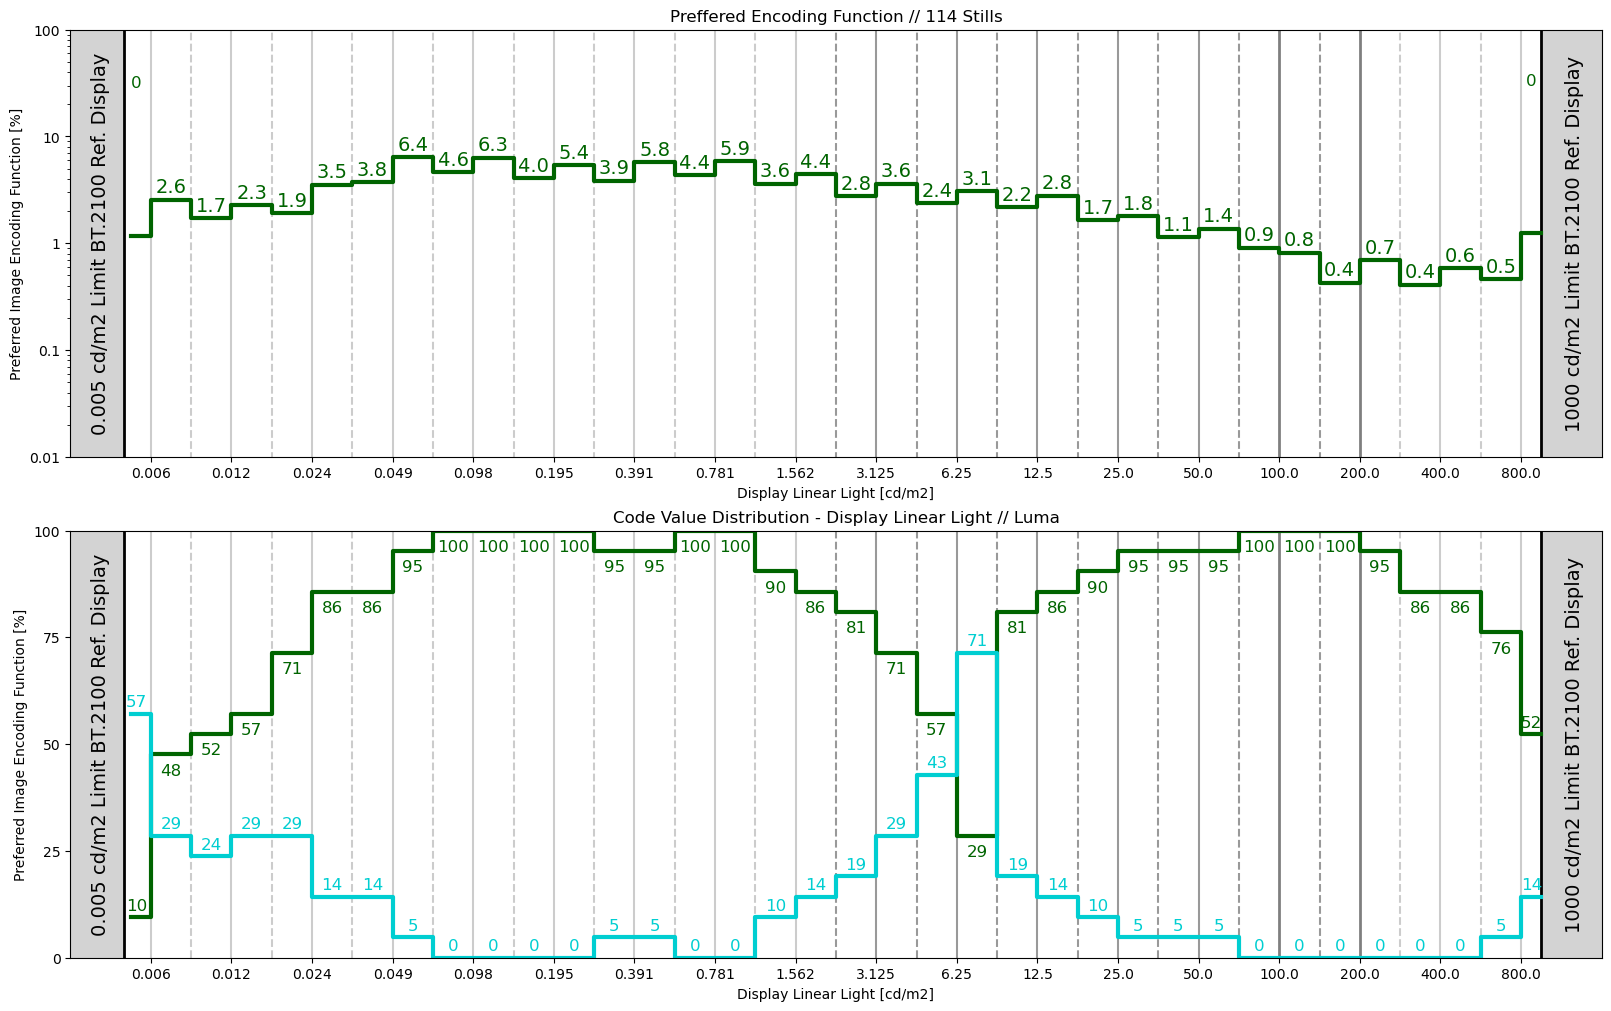

In [ ]:
figR, (axL, axL1) = plt.subplots(2, 1, figsize=(16, 10), constrained_layout=True, gridspec_kw={'height_ratios': [1 , 1]})


value_counter_image_hlg_FR = np.zeros((36))
value_counter_image_pq_FR = np.zeros((36))

axL.set_ylabel('Preferred Image Encoding Function [%]')
axL.set_xlabel('Display Linear Light [cd/m2]')

#x1 = np.linspace(0.000000000000001,1,1000000)

axL.vlines(0.5+2/3,0,10000000,color='black', linestyle="solid", alpha=1,linewidth=2)
axL.vlines(1.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(2.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(3.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(4.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(5.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(6.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(7.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(8.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(9.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(10.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(11.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(12.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(13.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(14.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(15.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL.vlines(16.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL.vlines(17.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(18.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(18.5+0.25,0,10000000,color='black', linestyle="solid", alpha=1, linewidth=2)

axL.vlines(2,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(3,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(4,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(5,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(6,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(7,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(8,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(9,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(10,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(11,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(12,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(13,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(14,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(15,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(16,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(17,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(18,0,10000000,color='gray', linestyle="dashed", alpha=0.4)


# value_counter_image_hlg_FR = split_array_to_stops(c.models.eotf_HLG_BT2100(legal2full(np.linspace(64,940,877)),0,1000))
# value_counter_image_pq_FR = split_array_to_stops(c.models.eotf_ST2084(legal2full(np.linspace(64,940,877))))


bars = ('A', 'B', 'C', 'D', 'E',
    'F','G', 'H', 'I', 'J', 
    'K','L','M', 'N', 'O', 
    'P', 'Q','R','A', 'B', 
    'C', 'D', 'E','F','G', 
    'H', 'I', 'J', 'K','L',
    'M', 'N', 'O', 'P', 'Q' , 'R')

y_pos = np.arange(len(bars))

folder = big_array_all_values_min[0,0,:]/sum(big_array_all_values_min[0,0,:])

# axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_hlg_FR,sum(value_counter_image_hlg_FR)), 'k',where="mid",linewidth=1,color="darkturquoise", label="HLG EOTF 10 bit Narrow Range",alpha=0.7)
# axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_pq_FR,sum(value_counter_image_pq_FR)), 'k',where="mid",linewidth=1,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=0.7)
axL.step(y_pos/2 + 1.25, big_array_all_values_min[0,0,:]/sum(big_array_all_values_min[0,0,:]), 'k',where="mid",linewidth=3,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=1)

counter1 = 1
counter2 = 1
for x, y in zip(y_pos[1:35]/2 + 1.25, folder[1:35]):
    axL.annotate((np.round(folder[counter1]*100,1)), (x, y), textcoords="offset points", xytext=(0,5), ha='center',fontsize=14,color="darkgreen")
    counter1 = counter1 + 1

axL.annotate(int(np.round(big_array_all_values_min[0,0,0])), (y_pos[0:1]/2 + 1.25, big_array_all_values_min[0,0,0:1]), textcoords="offset points", xytext=(4,5), ha='center',fontsize=12,color="darkgreen")
axL.annotate(int(np.round(big_array_all_values_min[0,0,35])), (y_pos[35:36]/2 + 1.25, big_array_all_values_min[0,0,35:36]), textcoords="offset points", xytext=(-7,5), ha='center',fontsize=12,color="darkgreen")


print(hlg_pq_counter_percentage[0,:,1])

y_pos_between = np.round([200 * 2 ** i for i in range(-15,3)],3)
y_pos_neu = np.linspace(0,17,18)

axL.set_xticks(y_pos_neu+1.5, y_pos_between)

axL.set_xlim(0.5,19.5)
axL.set_yscale("log")
axL.set_ylim(0.0001,1)
axL.set_yticks([0.0001,0.001,0.01,0.1,1],[0.01,0.1,1,10,100])



axL.set_title("Content Distribution Display Linear Light // 114 Stills")


axL1.set_ylabel('Preferred Image Encoding Function [%]')
axL1.set_xlabel('Display Linear Light [cd/m2]')

#x1 = np.linspace(0.000000000000001,1,1000000)

axL1.vlines(0.5+2/3,0,10000000,color='black', linestyle="solid", alpha=1,linewidth=2)
axL1.vlines(1.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(2.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(3.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(4.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(5.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(6.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(7.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(8.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(9.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(10.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(11.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(12.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(13.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(14.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(15.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL1.vlines(16.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL1.vlines(17.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(18.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(18.5+0.25,0,10000000,color='black', linestyle="solid", alpha=1, linewidth=2)

axL1.vlines(2,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(3,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(4,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(5,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(6,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(7,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(8,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(9,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(10,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(11,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(12,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(13,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(14,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(15,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(16,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(17,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(18,0,10000000,color='gray', linestyle="dashed", alpha=0.4)


# value_counter_image_hlg_FR = split_array_to_stops(c.models.eotf_HLG_BT2100(legal2full(np.linspace(64,940,877)),0,1000))
# value_counter_image_pq_FR = split_array_to_stops(c.models.eotf_ST2084(legal2full(np.linspace(64,940,877))))


bars = ('A', 'B', 'C', 'D', 'E',
    'F','G', 'H', 'I', 'J', 
    'K','L','M', 'N', 'O', 
    'P', 'Q','R','A', 'B', 
    'C', 'D', 'E','F','G', 
    'H', 'I', 'J', 'K','L',
    'M', 'N', 'O', 'P', 'Q' , 'R')

y_pos = np.arange(len(bars))

# axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_hlg_FR,sum(value_counter_image_hlg_FR)), 'k',where="mid",linewidth=1,color="darkturquoise", label="HLG EOTF 10 bit Narrow Range",alpha=0.7)
# axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_pq_FR,sum(value_counter_image_pq_FR)), 'k',where="mid",linewidth=1,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=0.7)
axL1.step(y_pos/2 + 1.25, hlg_pq_counter_percentage_min[0,:,0], 'k',where="mid",linewidth=3,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=1)
axL1.step(y_pos/2 + 1.25, hlg_pq_counter_percentage_min[0,:,1], 'k',where="mid",linewidth=3,color="darkturquoise", label="HLG EOTF 10 bit Narrow Range",alpha=1)

counter1 = 1
counter2 = 1
for x, y in zip(y_pos[1:35]/2 + 1.25, hlg_pq_counter_percentage_min[0,1:35,0]):
    axL1.annotate(int(np.round(hlg_pq_counter_percentage_min[0,counter1,0]*100,0)), (x, y), textcoords="offset points", xytext=(0,-15), ha='center',fontsize=12,color="darkgreen")
    counter1 = counter1 + 1

axL1.annotate(int(np.round(hlg_pq_counter_percentage_min[0,0,0]*100,0)), (y_pos[0:1]/2 + 1.25, hlg_pq_counter_percentage_min[0,0:1,0]), textcoords="offset points", xytext=(4,5), ha='center',fontsize=12,color="darkgreen")
axL1.annotate(int(np.round(hlg_pq_counter_percentage_min[0,35,0]*100,0)), (y_pos[35:36]/2 + 1.25, hlg_pq_counter_percentage_min[0,35:36,0]), textcoords="offset points", xytext=(-7,5), ha='center',fontsize=12,color="darkgreen")


for x, y in zip(y_pos[1:35]/2 + 1.25, hlg_pq_counter_percentage_min[0,1:35,1]):
    axL1.annotate(int(np.round(hlg_pq_counter_percentage_min[0,counter2,1]*100,0)), (x, y), textcoords="offset points", xytext=(0,5), ha='center',fontsize=12,color="darkturquoise")
    counter2 = counter2 + 1

axL1.annotate(int(np.round(hlg_pq_counter_percentage_min[0,0,1]*100,0)), (y_pos[0:1]/2 + 1.25, hlg_pq_counter_percentage_min[0,0:1,1]), textcoords="offset points", xytext=(4,5), ha='center',fontsize=12,color="darkturquoise")
axL1.annotate(int(np.round(hlg_pq_counter_percentage_min[0,35,1]*100,0)), (y_pos[35:36]/2 + 1.25, hlg_pq_counter_percentage_min[0,35:36,1]), textcoords="offset points", xytext=(-7,5), ha='center',fontsize=12,color="darkturquoise")


# for x, y in zip(y_pos/2 + 1.25, hlg_pq_counter_percentage[0,:,1]):
#     axL.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,0), ha='center')

print(hlg_pq_counter_percentage_min[0,:,1])

y_pos_between = np.round([200 * 2 ** i for i in range(-15,3)],3)
y_pos_neu = np.linspace(0,17,18)

axL1.set_xticks(y_pos_neu+1.5, y_pos_between)

axL1.set_xlim(0.5,19.5)
axL1.set_ylim(0,1)
axL1.set_yticks([0,0.25,0.5,0.75,1],[0,25,50,75,100])

axL.add_patch(Rectangle((0.5+2/3, 0), -100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))
axL1.add_patch(Rectangle((0.5+2/3, 0), -100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))
axL.add_patch(Rectangle((18.75, 0), 100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))
axL1.add_patch(Rectangle((18.75, 0), 100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))

axL1.set_title("Code Value Distribution - Display Linear Light // Luma")
axL.set_title("Preffered Encoding Function // 21 Low-Key Stills")

axL.text(0.88,0.01,"0.005 cd/m2 Limit BT.2100 Ref. Display",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=14)
axL1.text(0.88,0.5,"0.005 cd/m2 Limit BT.2100 Ref. Display",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=14)
axL.text(19.16,0.01,"1000 cd/m2 Limit BT.2100 Ref. Display",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=14)
axL1.text(19.16,0.5,"1000 cd/m2 Limit BT.2100 Ref. Display",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=14)


[ 0.98245614  0.85964912  0.84210526  0.83333333  0.78947368  0.71052632
  0.70175439  0.65789474  0.62280702  0.5877193   0.59649123  0.56140351
  0.53508772  0.51754386  0.44736842  0.38596491  0.39473684  0.39473684
  0.39473684  0.39473684  0.38596491  0.38596491  0.62280702  0.57017544
  0.55263158  0.56140351  0.50877193  0.48245614  0.39473684  0.35087719
  0.31578947  0.21929825  0.16666667  0.11403509  0.06140351  0.20175439]
[ 0.27868852  0.27868852  0.27868852  0.31147541  0.29508197  0.29508197
  0.31147541  0.32786885  0.31147541  0.36065574  0.44262295  0.54098361
  0.50819672  0.49180328  0.37704918  0.29508197  0.24590164  0.21311475
  0.18032787  0.14754098  0.09836066  0.04918033  0.95081967  0.83606557
  0.80327869  0.73770492  0.57377049  0.47540984  0.32786885  0.26229508
  0.21311475  0.04918033  0.03278689  0.04918033  0.03278689  0.13114754]


/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_74739/2629747830.py:70: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axL.step(y_pos/2 + 1.25, big_array_all_values_mid[0,0,:]/sum(big_array_all_values_mid[0,0,:]), 'k',where="mid",linewidth=3,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=1)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_74739/2629747830.py:160: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axL1.step(y_pos/2 + 1.25, hlg_pq_counter_percentage_mid[0,:,0], 'k',where="mid",linewidth=3,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=1)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_74739/2629747830.py:161: UserWarning: color is redundantly defined by the 'color' key

Text(19.16, 0.5, '1000 cd/m2 Limit BT.2100 Ref. Display')

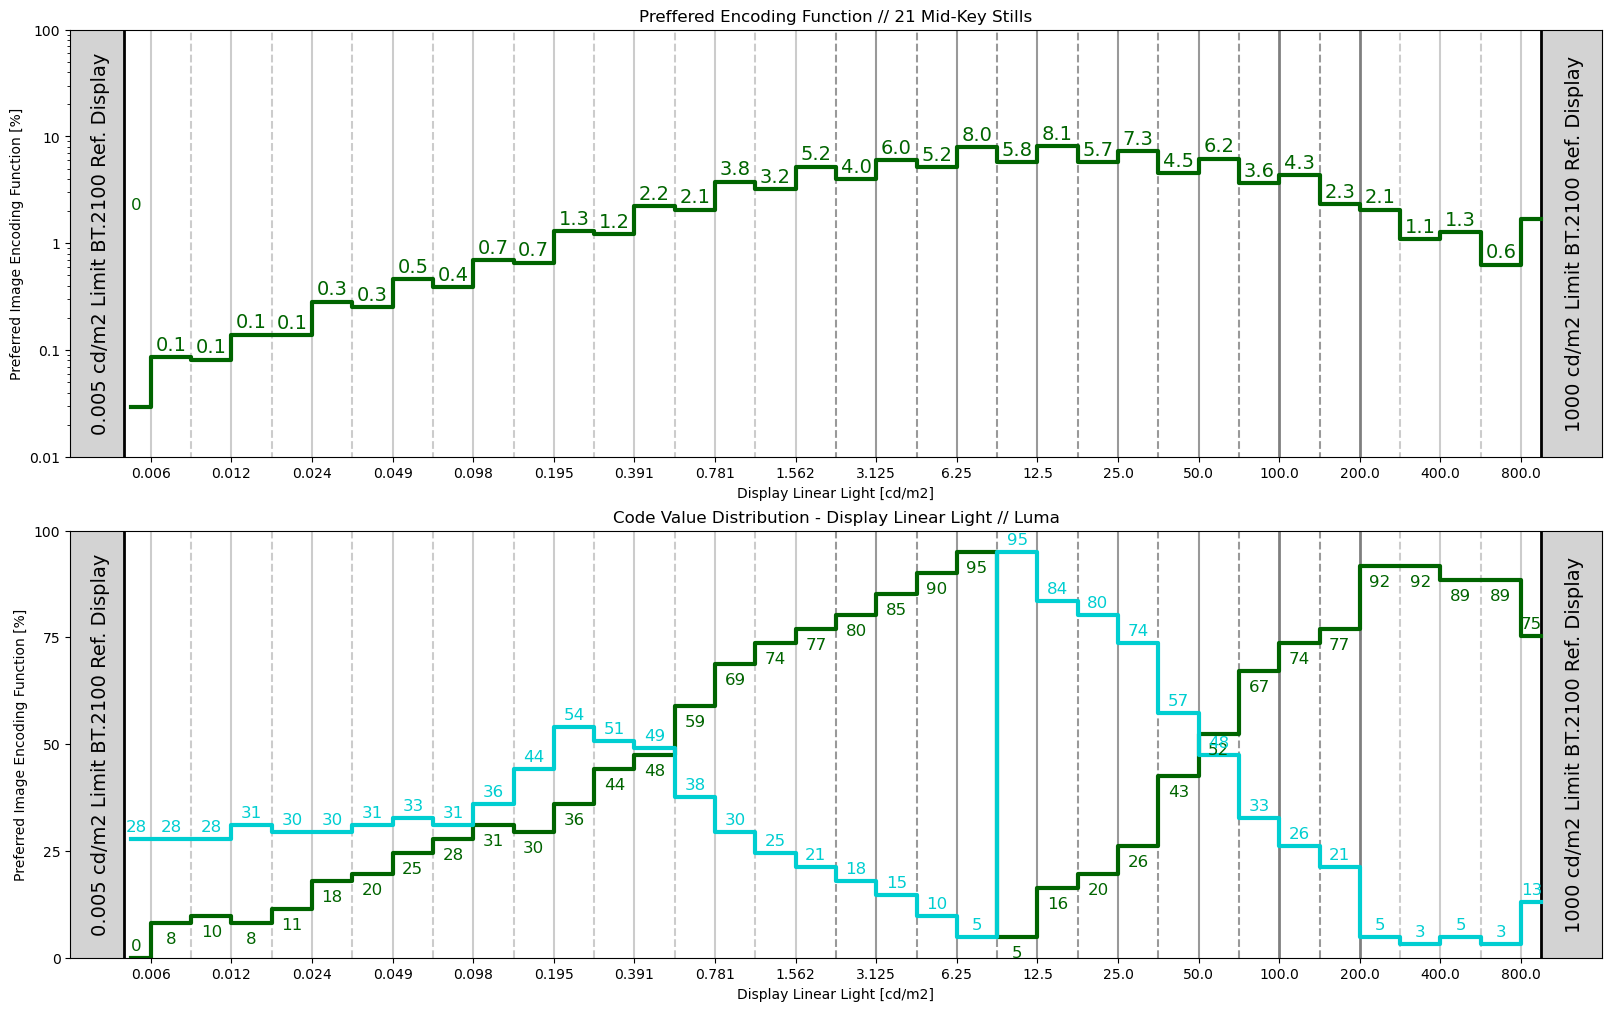

In [ ]:
figR, (axL, axL1) = plt.subplots(2, 1, figsize=(16, 10), constrained_layout=True, gridspec_kw={'height_ratios': [1 , 1]})


value_counter_image_hlg_FR = np.zeros((36))
value_counter_image_pq_FR = np.zeros((36))

axL.set_ylabel('Preferred Image Encoding Function [%]')
axL.set_xlabel('Display Linear Light [cd/m2]')

#x1 = np.linspace(0.000000000000001,1,1000000)

axL.vlines(0.5+2/3,0,10000000,color='black', linestyle="solid", alpha=1,linewidth=2)
axL.vlines(1.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(2.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(3.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(4.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(5.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(6.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(7.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(8.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(9.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(10.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(11.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(12.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(13.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(14.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(15.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL.vlines(16.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL.vlines(17.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(18.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(18.5+0.25,0,10000000,color='black', linestyle="solid", alpha=1, linewidth=2)

axL.vlines(2,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(3,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(4,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(5,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(6,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(7,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(8,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(9,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(10,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(11,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(12,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(13,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(14,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(15,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(16,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(17,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(18,0,10000000,color='gray', linestyle="dashed", alpha=0.4)


# value_counter_image_hlg_FR = split_array_to_stops(c.models.eotf_HLG_BT2100(legal2full(np.linspace(64,940,877)),0,1000))
# value_counter_image_pq_FR = split_array_to_stops(c.models.eotf_ST2084(legal2full(np.linspace(64,940,877))))


bars = ('A', 'B', 'C', 'D', 'E',
    'F','G', 'H', 'I', 'J', 
    'K','L','M', 'N', 'O', 
    'P', 'Q','R','A', 'B', 
    'C', 'D', 'E','F','G', 
    'H', 'I', 'J', 'K','L',
    'M', 'N', 'O', 'P', 'Q' , 'R')

y_pos = np.arange(len(bars))

folder = big_array_all_values_mid[0,0,:]/sum(big_array_all_values_mid[0,0,:])

# axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_hlg_FR,sum(value_counter_image_hlg_FR)), 'k',where="mid",linewidth=1,color="darkturquoise", label="HLG EOTF 10 bit Narrow Range",alpha=0.7)
# axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_pq_FR,sum(value_counter_image_pq_FR)), 'k',where="mid",linewidth=1,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=0.7)
axL.step(y_pos/2 + 1.25, big_array_all_values_mid[0,0,:]/sum(big_array_all_values_mid[0,0,:]), 'k',where="mid",linewidth=3,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=1)

counter1 = 1
counter2 = 1
for x, y in zip(y_pos[1:35]/2 + 1.25, folder[1:35]):
    axL.annotate((np.round(folder[counter1]*100,1)), (x, y), textcoords="offset points", xytext=(0,5), ha='center',fontsize=14,color="darkgreen")
    counter1 = counter1 + 1

axL.annotate(int(np.round(big_array_all_values_mid[0,0,0])), (y_pos[0:1]/2 + 1.25, big_array_all_values_mid[0,0,0:1]), textcoords="offset points", xytext=(4,5), ha='center',fontsize=12,color="darkgreen")
axL.annotate(int(np.round(big_array_all_values_mid[0,0,35])), (y_pos[35:36]/2 + 1.25, big_array_all_values_mid[0,0,35:36]), textcoords="offset points", xytext=(-7,5), ha='center',fontsize=12,color="darkgreen")


print(hlg_pq_counter_percentage[0,:,1])

y_pos_between = np.round([200 * 2 ** i for i in range(-15,3)],3)
y_pos_neu = np.linspace(0,17,18)

axL.set_xticks(y_pos_neu+1.5, y_pos_between)

axL.set_xlim(0.5,19.5)
axL.set_yscale("log")
axL.set_ylim(0.0001,1)
axL.set_yticks([0.0001,0.001,0.01,0.1,1],[0.01,0.1,1,10,100])



axL.set_title("Content Distribution Display Linear Light // 114 Stills")


axL1.set_ylabel('Preferred Image Encoding Function [%]')
axL1.set_xlabel('Display Linear Light [cd/m2]')

#x1 = np.linspace(0.000000000000001,1,1000000)

axL1.vlines(0.5+2/3,0,10000000,color='black', linestyle="solid", alpha=1,linewidth=2)
axL1.vlines(1.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(2.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(3.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(4.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(5.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(6.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(7.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(8.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(9.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(10.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(11.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(12.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(13.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(14.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(15.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL1.vlines(16.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL1.vlines(17.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(18.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(18.5+0.25,0,10000000,color='black', linestyle="solid", alpha=1, linewidth=2)

axL1.vlines(2,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(3,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(4,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(5,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(6,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(7,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(8,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(9,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(10,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(11,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(12,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(13,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(14,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(15,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(16,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(17,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(18,0,10000000,color='gray', linestyle="dashed", alpha=0.4)


# value_counter_image_hlg_FR = split_array_to_stops(c.models.eotf_HLG_BT2100(legal2full(np.linspace(64,940,877)),0,1000))
# value_counter_image_pq_FR = split_array_to_stops(c.models.eotf_ST2084(legal2full(np.linspace(64,940,877))))


bars = ('A', 'B', 'C', 'D', 'E',
    'F','G', 'H', 'I', 'J', 
    'K','L','M', 'N', 'O', 
    'P', 'Q','R','A', 'B', 
    'C', 'D', 'E','F','G', 
    'H', 'I', 'J', 'K','L',
    'M', 'N', 'O', 'P', 'Q' , 'R')

y_pos = np.arange(len(bars))

# axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_hlg_FR,sum(value_counter_image_hlg_FR)), 'k',where="mid",linewidth=1,color="darkturquoise", label="HLG EOTF 10 bit Narrow Range",alpha=0.7)
# axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_pq_FR,sum(value_counter_image_pq_FR)), 'k',where="mid",linewidth=1,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=0.7)
axL1.step(y_pos/2 + 1.25, hlg_pq_counter_percentage_mid[0,:,0], 'k',where="mid",linewidth=3,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=1)
axL1.step(y_pos/2 + 1.25, hlg_pq_counter_percentage_mid[0,:,1], 'k',where="mid",linewidth=3,color="darkturquoise", label="HLG EOTF 10 bit Narrow Range",alpha=1)

counter1 = 1
counter2 = 1
for x, y in zip(y_pos[1:35]/2 + 1.25, hlg_pq_counter_percentage_mid[0,1:35,0]):
    axL1.annotate(int(np.round(hlg_pq_counter_percentage_mid[0,counter1,0]*100,0)), (x, y), textcoords="offset points", xytext=(0,-15), ha='center',fontsize=12,color="darkgreen")
    counter1 = counter1 + 1

axL1.annotate(int(np.round(hlg_pq_counter_percentage_mid[0,0,0]*100,0)), (y_pos[0:1]/2 + 1.25, hlg_pq_counter_percentage_mid[0,0:1,0]), textcoords="offset points", xytext=(4,5), ha='center',fontsize=12,color="darkgreen")
axL1.annotate(int(np.round(hlg_pq_counter_percentage_mid[0,35,0]*100,0)), (y_pos[35:36]/2 + 1.25, hlg_pq_counter_percentage_mid[0,35:36,0]), textcoords="offset points", xytext=(-7,5), ha='center',fontsize=12,color="darkgreen")


for x, y in zip(y_pos[1:35]/2 + 1.25, hlg_pq_counter_percentage_mid[0,1:35,1]):
    axL1.annotate(int(np.round(hlg_pq_counter_percentage_mid[0,counter2,1]*100,0)), (x, y), textcoords="offset points", xytext=(0,5), ha='center',fontsize=12,color="darkturquoise")
    counter2 = counter2 + 1

axL1.annotate(int(np.round(hlg_pq_counter_percentage_mid[0,0,1]*100,0)), (y_pos[0:1]/2 + 1.25, hlg_pq_counter_percentage_mid[0,0:1,1]), textcoords="offset points", xytext=(4,5), ha='center',fontsize=12,color="darkturquoise")
axL1.annotate(int(np.round(hlg_pq_counter_percentage_mid[0,35,1]*100,0)), (y_pos[35:36]/2 + 1.25, hlg_pq_counter_percentage_mid[0,35:36,1]), textcoords="offset points", xytext=(-7,5), ha='center',fontsize=12,color="darkturquoise")


# for x, y in zip(y_pos/2 + 1.25, hlg_pq_counter_percentage[0,:,1]):
#     axL.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,0), ha='center')

print(hlg_pq_counter_percentage_mid[0,:,1])

y_pos_between = np.round([200 * 2 ** i for i in range(-15,3)],3)
y_pos_neu = np.linspace(0,17,18)

axL1.set_xticks(y_pos_neu+1.5, y_pos_between)

axL1.set_xlim(0.5,19.5)
axL1.set_ylim(0,1)
axL1.set_yticks([0,0.25,0.5,0.75,1],[0,25,50,75,100])

axL.add_patch(Rectangle((0.5+2/3, 0), -100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))
axL1.add_patch(Rectangle((0.5+2/3, 0), -100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))
axL.add_patch(Rectangle((18.75, 0), 100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))
axL1.add_patch(Rectangle((18.75, 0), 100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))

axL1.set_title("Code Value Distribution - Display Linear Light // Luma")
axL.set_title("Preffered Encoding Function // 21 Mid-Key Stills")

axL.text(0.88,0.01,"0.005 cd/m2 Limit BT.2100 Ref. Display",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=14)
axL1.text(0.88,0.5,"0.005 cd/m2 Limit BT.2100 Ref. Display",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=14)
axL.text(19.16,0.01,"1000 cd/m2 Limit BT.2100 Ref. Display",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=14)
axL1.text(19.16,0.5,"1000 cd/m2 Limit BT.2100 Ref. Display",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=14)


[ 0.98245614  0.85964912  0.84210526  0.83333333  0.78947368  0.71052632
  0.70175439  0.65789474  0.62280702  0.5877193   0.59649123  0.56140351
  0.53508772  0.51754386  0.44736842  0.38596491  0.39473684  0.39473684
  0.39473684  0.39473684  0.38596491  0.38596491  0.62280702  0.57017544
  0.55263158  0.56140351  0.50877193  0.48245614  0.39473684  0.35087719
  0.31578947  0.21929825  0.16666667  0.11403509  0.06140351  0.20175439]
[ 0.10416667  0.10416667  0.10416667  0.10416667  0.125       0.1875
  0.25        0.3125      0.35416667  0.35416667  0.41666667  0.47916667
  0.5625      0.58333333  0.58333333  0.58333333  0.66666667  0.6875
  0.6875      0.64583333  0.58333333  0.52083333  0.5         0.5625
  0.60416667  0.6875      0.75        0.79166667  0.77083333  0.77083333
  0.70833333  0.52083333  0.39583333  0.22916667  0.125       0.27083333]


/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_74739/1156747267.py:70: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axL.step(y_pos/2 + 1.25, big_array_all_values_max[0,0,:]/sum(big_array_all_values_max[0,0,:]), 'k',where="mid",linewidth=3,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=1)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_74739/1156747267.py:160: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axL1.step(y_pos/2 + 1.25, hlg_pq_counter_percentage_max[0,:,0], 'k',where="mid",linewidth=3,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=1)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_74739/1156747267.py:161: UserWarning: color is redundantly defined by the 'color' key

Text(19.16, 0.5, '1000 cd/m2 Limit BT.2100 Ref. Display')

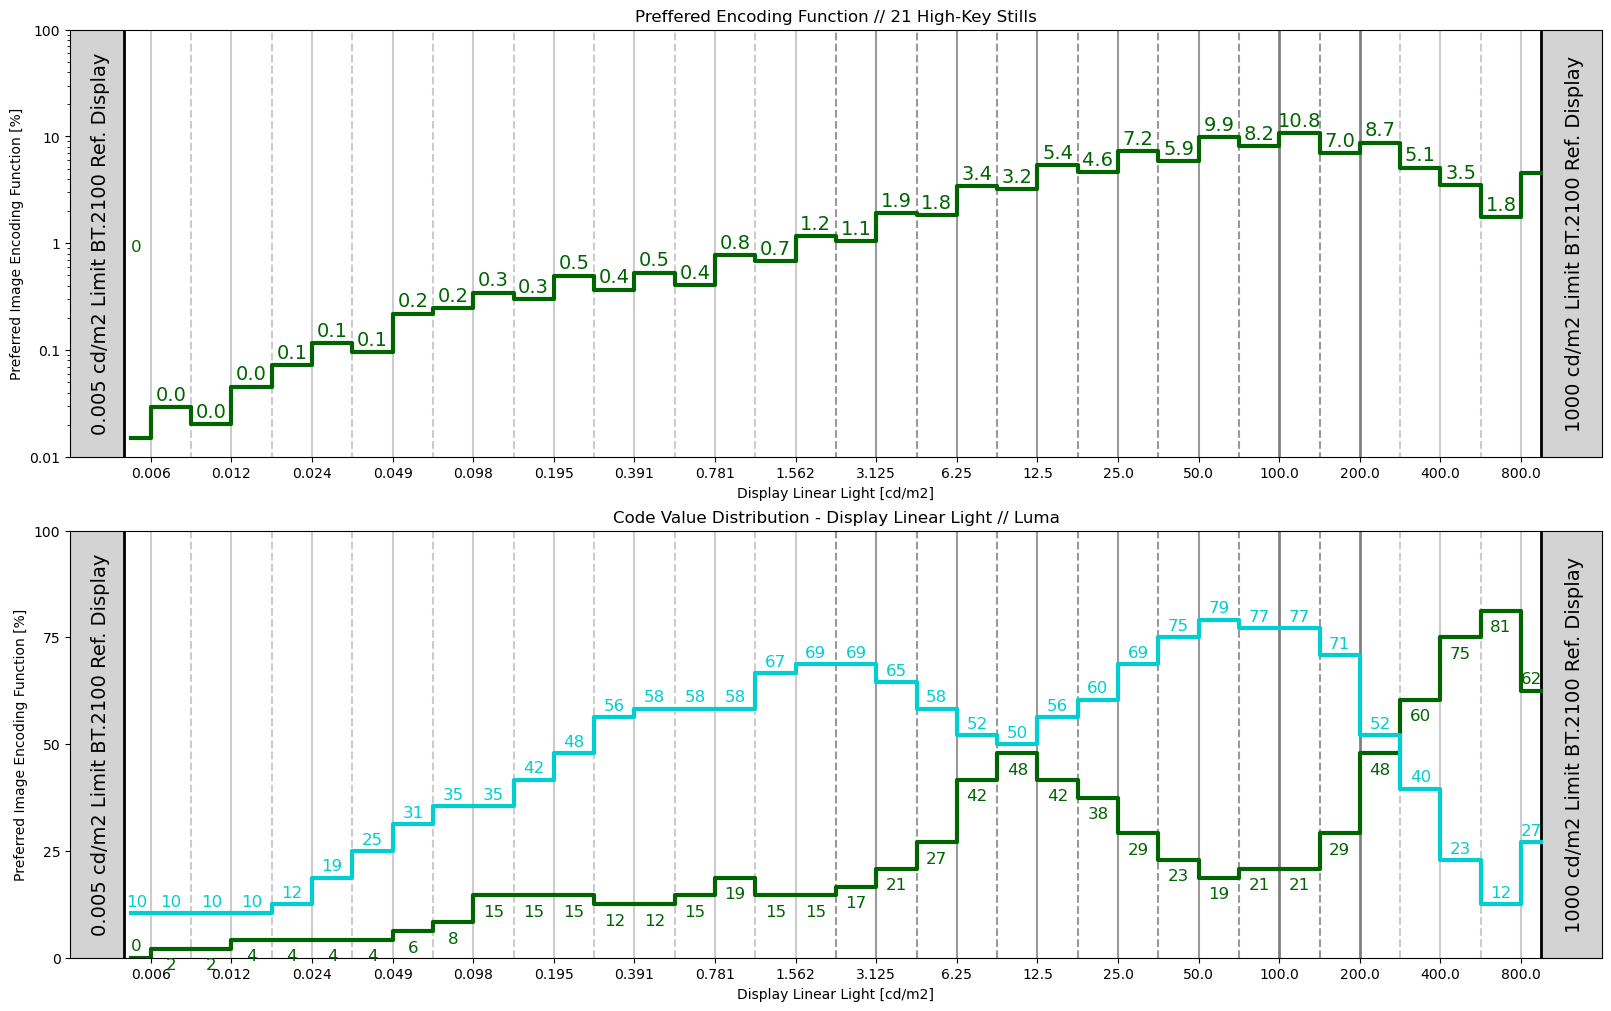

In [ ]:
figR, (axL, axL1) = plt.subplots(2, 1, figsize=(16, 10), constrained_layout=True, gridspec_kw={'height_ratios': [1 , 1]})


value_counter_image_hlg_FR = np.zeros((36))
value_counter_image_pq_FR = np.zeros((36))

axL.set_ylabel('Preferred Image Encoding Function [%]')
axL.set_xlabel('Display Linear Light [cd/m2]')

#x1 = np.linspace(0.000000000000001,1,1000000)

axL.vlines(0.5+2/3,0,10000000,color='black', linestyle="solid", alpha=1,linewidth=2)
axL.vlines(1.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(2.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(3.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(4.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(5.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(6.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(7.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(8.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(9.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(10.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(11.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(12.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(13.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(14.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(15.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL.vlines(16.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL.vlines(17.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(18.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(18.5+0.25,0,10000000,color='black', linestyle="solid", alpha=1, linewidth=2)

axL.vlines(2,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(3,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(4,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(5,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(6,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(7,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(8,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(9,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(10,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(11,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(12,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(13,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(14,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(15,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(16,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(17,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(18,0,10000000,color='gray', linestyle="dashed", alpha=0.4)


# value_counter_image_hlg_FR = split_array_to_stops(c.models.eotf_HLG_BT2100(legal2full(np.linspace(64,940,877)),0,1000))
# value_counter_image_pq_FR = split_array_to_stops(c.models.eotf_ST2084(legal2full(np.linspace(64,940,877))))


bars = ('A', 'B', 'C', 'D', 'E',
    'F','G', 'H', 'I', 'J', 
    'K','L','M', 'N', 'O', 
    'P', 'Q','R','A', 'B', 
    'C', 'D', 'E','F','G', 
    'H', 'I', 'J', 'K','L',
    'M', 'N', 'O', 'P', 'Q' , 'R')

y_pos = np.arange(len(bars))

folder = big_array_all_values_max[0,0,:]/sum(big_array_all_values_max[0,0,:])

# axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_hlg_FR,sum(value_counter_image_hlg_FR)), 'k',where="mid",linewidth=1,color="darkturquoise", label="HLG EOTF 10 bit Narrow Range",alpha=0.7)
# axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_pq_FR,sum(value_counter_image_pq_FR)), 'k',where="mid",linewidth=1,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=0.7)
axL.step(y_pos/2 + 1.25, big_array_all_values_max[0,0,:]/sum(big_array_all_values_max[0,0,:]), 'k',where="mid",linewidth=3,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=1)

counter1 = 1
counter2 = 1
for x, y in zip(y_pos[1:35]/2 + 1.25, folder[1:35]):
    axL.annotate((np.round(folder[counter1]*100,1)), (x, y), textcoords="offset points", xytext=(0,5), ha='center',fontsize=14,color="darkgreen")
    counter1 = counter1 + 1

axL.annotate(int(np.round(big_array_all_values_max[0,0,0])), (y_pos[0:1]/2 + 1.25, big_array_all_values_max[0,0,0:1]), textcoords="offset points", xytext=(4,5), ha='center',fontsize=12,color="darkgreen")
axL.annotate(int(np.round(big_array_all_values_max[0,0,35])), (y_pos[35:36]/2 + 1.25, big_array_all_values_max[0,0,35:36]), textcoords="offset points", xytext=(-7,5), ha='center',fontsize=12,color="darkgreen")


print(hlg_pq_counter_percentage[0,:,1])

y_pos_between = np.round([200 * 2 ** i for i in range(-15,3)],3)
y_pos_neu = np.linspace(0,17,18)

axL.set_xticks(y_pos_neu+1.5, y_pos_between)

axL.set_xlim(0.5,19.5)
axL.set_yscale("log")
axL.set_ylim(0.0001,1)
axL.set_yticks([0.0001,0.001,0.01,0.1,1],[0.01,0.1,1,10,100])



axL.set_title("Content Distribution Display Linear Light // 114 Stills")


axL1.set_ylabel('Preferred Image Encoding Function [%]')
axL1.set_xlabel('Display Linear Light [cd/m2]')

#x1 = np.linspace(0.000000000000001,1,1000000)

axL1.vlines(0.5+2/3,0,10000000,color='black', linestyle="solid", alpha=1,linewidth=2)
axL1.vlines(1.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(2.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(3.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(4.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(5.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(6.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(7.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(8.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(9.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(10.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(11.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(12.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(13.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(14.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(15.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL1.vlines(16.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL1.vlines(17.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(18.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(18.5+0.25,0,10000000,color='black', linestyle="solid", alpha=1, linewidth=2)

axL1.vlines(2,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(3,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(4,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(5,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(6,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(7,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(8,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(9,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(10,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(11,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(12,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(13,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(14,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(15,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(16,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(17,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(18,0,10000000,color='gray', linestyle="dashed", alpha=0.4)


# value_counter_image_hlg_FR = split_array_to_stops(c.models.eotf_HLG_BT2100(legal2full(np.linspace(64,940,877)),0,1000))
# value_counter_image_pq_FR = split_array_to_stops(c.models.eotf_ST2084(legal2full(np.linspace(64,940,877))))


bars = ('A', 'B', 'C', 'D', 'E',
    'F','G', 'H', 'I', 'J', 
    'K','L','M', 'N', 'O', 
    'P', 'Q','R','A', 'B', 
    'C', 'D', 'E','F','G', 
    'H', 'I', 'J', 'K','L',
    'M', 'N', 'O', 'P', 'Q' , 'R')

y_pos = np.arange(len(bars))

# axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_hlg_FR,sum(value_counter_image_hlg_FR)), 'k',where="mid",linewidth=1,color="darkturquoise", label="HLG EOTF 10 bit Narrow Range",alpha=0.7)
# axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_pq_FR,sum(value_counter_image_pq_FR)), 'k',where="mid",linewidth=1,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=0.7)
axL1.step(y_pos/2 + 1.25, hlg_pq_counter_percentage_max[0,:,0], 'k',where="mid",linewidth=3,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=1)
axL1.step(y_pos/2 + 1.25, hlg_pq_counter_percentage_max[0,:,1], 'k',where="mid",linewidth=3,color="darkturquoise", label="HLG EOTF 10 bit Narrow Range",alpha=1)

counter1 = 1
counter2 = 1
for x, y in zip(y_pos[1:35]/2 + 1.25, hlg_pq_counter_percentage_max[0,1:35,0]):
    axL1.annotate(int(np.round(hlg_pq_counter_percentage_max[0,counter1,0]*100,0)), (x, y), textcoords="offset points", xytext=(0,-15), ha='center',fontsize=12,color="darkgreen")
    counter1 = counter1 + 1

axL1.annotate(int(np.round(hlg_pq_counter_percentage_max[0,0,0]*100,0)), (y_pos[0:1]/2 + 1.25, hlg_pq_counter_percentage_max[0,0:1,0]), textcoords="offset points", xytext=(4,5), ha='center',fontsize=12,color="darkgreen")
axL1.annotate(int(np.round(hlg_pq_counter_percentage_max[0,35,0]*100,0)), (y_pos[35:36]/2 + 1.25, hlg_pq_counter_percentage_max[0,35:36,0]), textcoords="offset points", xytext=(-7,5), ha='center',fontsize=12,color="darkgreen")


for x, y in zip(y_pos[1:35]/2 + 1.25, hlg_pq_counter_percentage_max[0,1:35,1]):
    axL1.annotate(int(np.round(hlg_pq_counter_percentage_max[0,counter2,1]*100,0)), (x, y), textcoords="offset points", xytext=(0,5), ha='center',fontsize=12,color="darkturquoise")
    counter2 = counter2 + 1

axL1.annotate(int(np.round(hlg_pq_counter_percentage_max[0,0,1]*100,0)), (y_pos[0:1]/2 + 1.25, hlg_pq_counter_percentage_max[0,0:1,1]), textcoords="offset points", xytext=(4,5), ha='center',fontsize=12,color="darkturquoise")
axL1.annotate(int(np.round(hlg_pq_counter_percentage_max[0,35,1]*100,0)), (y_pos[35:36]/2 + 1.25, hlg_pq_counter_percentage_max[0,35:36,1]), textcoords="offset points", xytext=(-7,5), ha='center',fontsize=12,color="darkturquoise")


# for x, y in zip(y_pos/2 + 1.25, hlg_pq_counter_percentage[0,:,1]):
#     axL.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,0), ha='center')

print(hlg_pq_counter_percentage_max[0,:,1])

y_pos_between = np.round([200 * 2 ** i for i in range(-15,3)],3)
y_pos_neu = np.linspace(0,17,18)

axL1.set_xticks(y_pos_neu+1.5, y_pos_between)

axL1.set_xlim(0.5,19.5)
axL1.set_ylim(0,1)
axL1.set_yticks([0,0.25,0.5,0.75,1],[0,25,50,75,100])

axL.add_patch(Rectangle((0.5+2/3, 0), -100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))
axL1.add_patch(Rectangle((0.5+2/3, 0), -100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))
axL.add_patch(Rectangle((18.75, 0), 100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))
axL1.add_patch(Rectangle((18.75, 0), 100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))

axL1.set_title("Code Value Distribution - Display Linear Light // Luma")
axL.set_title("Preffered Encoding Function // 21 High-Key Stills")

axL.text(0.88,0.01,"0.005 cd/m2 Limit BT.2100 Ref. Display",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=14)
axL1.text(0.88,0.5,"0.005 cd/m2 Limit BT.2100 Ref. Display",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=14)
axL.text(19.16,0.01,"1000 cd/m2 Limit BT.2100 Ref. Display",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=14)
axL1.text(19.16,0.5,"1000 cd/m2 Limit BT.2100 Ref. Display",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=14)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


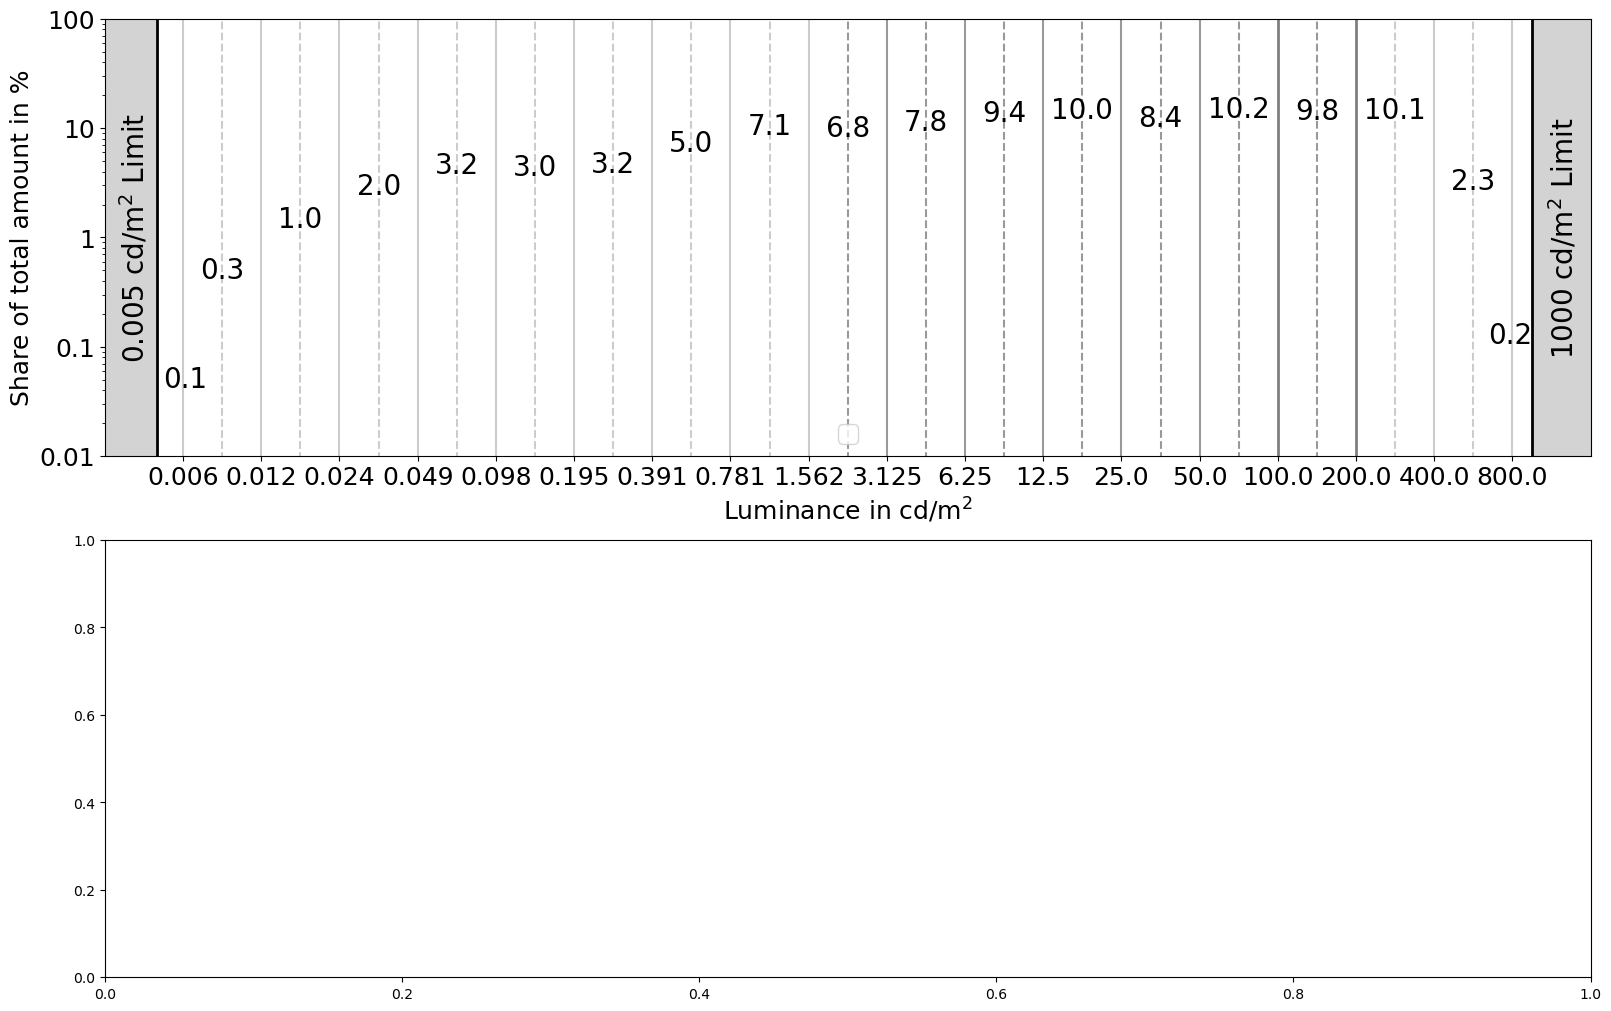

In [9]:
figR, (axL, axL1) = plt.subplots(2, 1, figsize=(16, 10), constrained_layout=True, gridspec_kw={'height_ratios': [1 , 1]})


value_counter_image_hlg_FR = np.zeros((36))
value_counter_image_pq_FR = np.zeros((36))

axL.set_ylabel('Share of total amount in %',fontsize=18)
axL.set_xlabel('Luminance in $\mathregular{cd/m^2}$',fontsize=18)

#x1 = np.linspace(0.000000000000001,1,1000000)

axL.vlines(0.5+2/3,0,10000000,color='black', linestyle="solid", alpha=1,linewidth=2)
axL.vlines(1.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(2.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(3.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(4.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(5.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(6.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(7.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(8.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(9.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(10.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(11.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(12.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(13.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(14.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(15.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL.vlines(16.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL.vlines(17.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(18.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(18.5+0.25,0,10000000,color='black', linestyle="solid", alpha=1, linewidth=2)

axL.vlines(2,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(3,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(4,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(5,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(6,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(7,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(8,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(9,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(10,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(11,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(12,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(13,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(14,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(15,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(16,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(17,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(18,0,10000000,color='gray', linestyle="dashed", alpha=0.4)


# value_counter_image_hlg_FR = split_array_to_stops(c.models.eotf_HLG_BT2100(legal2full(np.linspace(64,940,877)),0,1000))
# value_counter_image_pq_FR = split_array_to_stops(c.models.eotf_ST2084(legal2full(np.linspace(64,940,877))))


bars = ('A', 'B', 'C', 'D', 'E',
    'F','G', 'H', 'I', 'J', 
    'K','L','M', 'N', 'O', 
    'P', 'Q','R','A')

y_pos = np.arange(len(bars))

folder = big_array_all_values[0,0,:]/sum(big_array_all_values[0,0,:])
new_array = np.zeros((19))
new_array[0] = folder[0]
new_array[1] = folder[1]+folder[2]
new_array[2] = folder[3]+folder[4]
new_array[3] = folder[5]+folder[6]
new_array[4] = folder[7]+folder[8]
new_array[5] = folder[9]+folder[10]
new_array[6] = folder[11]+folder[12]
new_array[7] = folder[13]+folder[14]
new_array[8] = folder[15]+folder[16]
new_array[9] = folder[17]+folder[18]
new_array[10] = folder[19]+folder[20]
new_array[11] = folder[21]+folder[22]
new_array[12] = folder[23]+folder[24]
new_array[13] = folder[25]+folder[26]
new_array[14] = folder[27]+folder[28]
new_array[15] = folder[29]+folder[30]
new_array[16] = folder[31]+folder[32]
new_array[17] = folder[33]+folder[34]
new_array[18] = folder[35]

# axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_hlg_FR,sum(value_counter_image_hlg_FR)), 'k',where="mid",linewidth=1,color="darkturquoise", label="HLG EOTF 10 bit Narrow Range",alpha=0.7)
# axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_pq_FR,sum(value_counter_image_pq_FR)), 'k',where="mid",linewidth=1,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=0.7)
#axL.step(y_pos + 1, new_array, 'k',where="mid",linewidth=3,color="darkgreen", label="Luminance Distribution 80 stills",alpha=1)

counter1 = 1
counter2 = 1
for x, y in zip(y_pos[1:18] + 1, new_array[1:18]):
    axL.annotate((np.round(new_array[counter1]*100,1)), (x, y), textcoords="offset points", xytext=(0,7), ha='center',fontsize=20,color="black")
    counter1 = counter1 + 1

axL.annotate(np.round(new_array[0]*100,1), (y_pos[0] + 1, new_array[0]), textcoords="offset points", xytext=(30,-21), ha='center',fontsize=20,color="black")
axL.annotate(np.round(new_array[18]*100,1), (y_pos[18] + 1, new_array[18]), textcoords="offset points", xytext=(-30,-21), ha='center',fontsize=20,color="black")



y_pos_between = np.round([200 * 2 ** i for i in range(-15,3)],3)
y_pos_neu = np.linspace(0,17,18)

axL.set_xticks(y_pos_neu+1.5, y_pos_between,fontsize=18)

axL.set_xlim(0.5,19.5)
axL.set_yscale("log")
axL.set_ylim(0.0001,1)
axL.set_yticks([0.0001,0.001,0.01,0.1,1],[0.01,0.1,1,10,100],fontsize=18)


axL.add_patch(Rectangle((0.5+2/3, 0), -100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))
axL.add_patch(Rectangle((18.75, 0), 100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))

#axL.set_title("Content Distribution Display Linear Light // 114 Stills")

axL.text(0.88,0.01,"0.005 $\mathregular{cd/m^2}$ Limit",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=20)
axL.text(19.16,0.01,"1000 $\mathregular{cd/m^2}$ Limit",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=20)
axL.legend(fontsize=18)

/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_21831/2601773878.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axL1.step(y_pos + 1, value_counter_image_hlg_FR, 'k',where="mid",linewidth=2,color="darkturquoise", label="HLG EOTF 10-bit Narrow Range",alpha=1)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_21831/2601773878.py:63: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axL1.step(y_pos + 1, value_counter_image_pq_FR, 'k',where="mid",linewidth=2,color="darkgreen", label="PQ EOTF 10-bit Narrow Range",alpha=1)


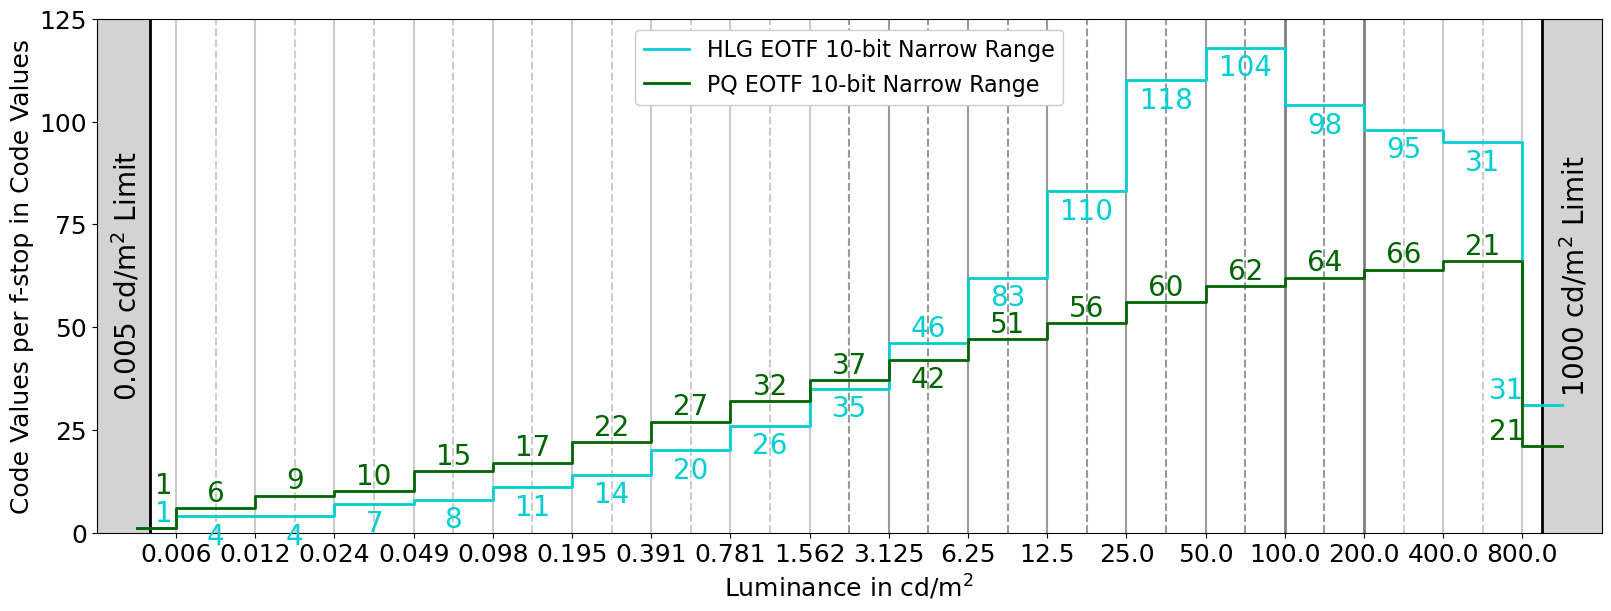

In [62]:
figR, (axL1) = plt.subplots(1, 1, figsize=(16, 6), constrained_layout=True)


axL1.set_ylabel('Code Values per f-stop in Code Values',fontsize=18)
axL1.set_xlabel('Luminance in $\mathregular{cd/m^2}$',fontsize=18)

#x1 = np.linspace(0.000000000000001,1,1000000)

axL1.vlines(0.5+2/3,0,10000000,color='black', linestyle="solid", alpha=1,linewidth=2)
axL1.vlines(1.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(2.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(3.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(4.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(5.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(6.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(7.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(8.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(9.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(10.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(11.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(12.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(13.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(14.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL1.vlines(15.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL1.vlines(16.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL1.vlines(17.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(18.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL1.vlines(18.5+0.25,0,10000000,color='black', linestyle="solid", alpha=1, linewidth=2)



axL1.vlines(2,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(3,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(4,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(5,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(6,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(7,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(8,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(9,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(10,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(11,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(12,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(13,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(14,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(15,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(16,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL1.vlines(17,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL1.vlines(18,0,10000000,color='gray', linestyle="dashed", alpha=0.4)


value_counter_image_hlg_FR = split_array_to_stops(c.models.eotf_HLG_BT2100(legal2full(np.linspace(64,940,877)),0.005,1000))
value_counter_image_pq_FR = split_array_to_stops(c.models.eotf_ST2084(legal2full(np.linspace(78,722,645))))


bars = ('A', 'B', 'C', 'D', 'E',
    'F','G', 'H', 'I', 'J', 
    'K','L','M', 'N', 'O', 
    'P', 'Q','R','A')

y_pos = np.arange(len(bars))

axL1.step(y_pos + 1, value_counter_image_hlg_FR, 'k',where="mid",linewidth=2,color="darkturquoise", label="HLG EOTF 10-bit Narrow Range",alpha=1)
axL1.step(y_pos + 1, value_counter_image_pq_FR, 'k',where="mid",linewidth=2,color="darkgreen", label="PQ EOTF 10-bit Narrow Range",alpha=1)

y_pos_between = np.round([200 * 2 ** i for i in range(-15,3)],3)
y_pos_neu = np.linspace(0,17,18)

axL1.set_xticks(y_pos_neu+1.5, y_pos_between,fontsize=18)

axL1.set_xlim(0.5,19.5)
axL1.set_ylim(0,125)
axL1.set_yticks([0,25,50,75,100,125],[0,25,50,75,100,125],fontsize=18)

counter1 = 1
counter2 = 1

for x, y in zip(y_pos[1:10] + 1, value_counter_image_pq_FR[1:10]):
    axL1.annotate(int(np.round(value_counter_image_pq_FR[counter1],0)), (x, y), textcoords="offset points", xytext=(0,5), ha='center',fontsize=20,color="darkgreen")
    counter1 = counter1 + 1

counter1 = 12
for x, y in zip(y_pos[11:18] + 1, value_counter_image_pq_FR[11:18]):
    axL1.annotate(int(np.round(value_counter_image_pq_FR[counter1],0)), (x, y), textcoords="offset points", xytext=(0,5), ha='center',fontsize=20,color="darkgreen")
    counter1 = counter1 + 1


axL1.annotate(int(np.round(value_counter_image_pq_FR[10],0)), (y_pos[10] + 1, value_counter_image_pq_FR[10]), textcoords="offset points", xytext=(0,-20), ha='center',fontsize=20,color="darkgreen")
axL1.annotate(int(np.round(value_counter_image_pq_FR[0],0)), (y_pos[0] + 1, value_counter_image_pq_FR[0]), textcoords="offset points", xytext=(20,25), ha='center',fontsize=20,color="darkgreen")
axL1.annotate(int(np.round(value_counter_image_pq_FR[18],0)), (y_pos[18] + 1, value_counter_image_pq_FR[18]), textcoords="offset points", xytext=(-40,5), ha='center',fontsize=20,color="darkgreen")


for x, y in zip(y_pos[1:10] + 1, value_counter_image_hlg_FR[1:10]):
    axL1.annotate(int(np.round(value_counter_image_hlg_FR[counter2],0)), (x, y), textcoords="offset points", xytext=(0,0-20), ha='center',fontsize=20,color="darkturquoise")
    counter2 = counter2 + 1

counter2 = 12
for x, y in zip(y_pos[11:18] + 1, value_counter_image_hlg_FR[11:18]):
    axL1.annotate(int(np.round(value_counter_image_hlg_FR[counter2],0)), (x, y), textcoords="offset points", xytext=(0,0-20), ha='center',fontsize=20,color="darkturquoise")
    counter2 = counter2 + 1

axL1.annotate(int(np.round(value_counter_image_hlg_FR[10],0)), (y_pos[10] + 1, value_counter_image_hlg_FR[10]), textcoords="offset points", xytext=(0,5), ha='center',fontsize=20,color="darkturquoise")
axL1.annotate(int(np.round(value_counter_image_hlg_FR[0],0)), (y_pos[0] + 1, value_counter_image_hlg_FR[0]), textcoords="offset points", xytext=(20,5), ha='center',fontsize=20,color="darkturquoise")
axL1.annotate(int(np.round(value_counter_image_hlg_FR[18],0)), (y_pos[18] + 1, value_counter_image_hlg_FR[18]), textcoords="offset points", xytext=(-40,5), ha='center',fontsize=20,color="darkturquoise")



axL1.add_patch(Rectangle((0.5+2/3, 0), -100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))
axL1.add_patch(Rectangle((18.75, 0), 100, 10000000,facecolor = 'lightgray',fill=True,alpha=1))

#axL1.set_title("Code Value Distribution - Display Linear Light // Luma")

axL1.text(0.88,50+12.5,"0.005 $\mathregular{cd/m^2}$ Limit",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=20)
axL1.text(19.16,50+12.5,"1000 $\mathregular{cd/m^2}$ Limit",rotation=90,horizontalalignment="center",verticalalignment="center",fontsize=20)

axL1.legend(facecolor='white', framealpha=1,loc='upper center',fontsize=16)

In [ ]:
sum(value_counter_image_hlg_FR)

877

In [ ]:
940-64

876

In [ ]:
print(test[10:-10])

aaaaaabbbbbbbbbbbbbaa


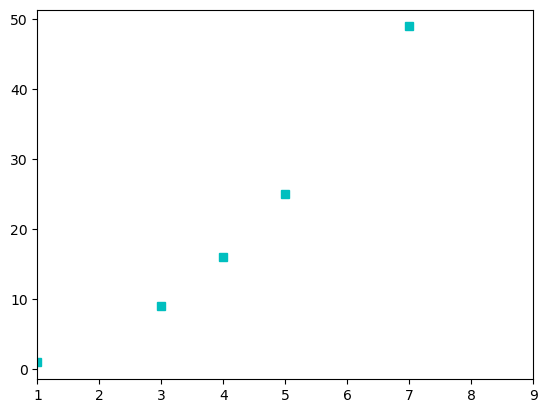

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 

x = np.array([1, 3, 4, 5, 7]) 
y = np.array([1, 9, 16, 25, 49]) 

plt.step(x, y, 'cs', where='mid') 
plt.xlim(1, 9) 
plt.show() 


In [ ]:
uhd_testbild_luminance = np.zeros((2160,3840,3))

In [ ]:
np.linspace(3840*2,3839*(3)+2,3840)

array([  7680.,   7681.,   7682., ...,  11517.,  11518.,  11519.])

In [ ]:
c.models.eotf_inverse_ST2084(1000)

0.75182709624704103

In [ ]:
counter = 0
for i in range(0,2000,100):
    for x in range(100):
        uhd_testbild_luminance[(1*i)+x,:,0] = np.logspace(3840*(i/100),3839*((i/100)+1)+(i/100),3840)
        print((1*i)+x)
        print(uhd_testbild_luminance[(1*i)+x,:,0])
uhd_testbild_luminance[:,:,1] = uhd_testbild_luminance[:,:,0]
uhd_testbild_luminance[:,:,2] = uhd_testbild_luminance[:,:,0]
uhd_testbild_luminance = np.divide(uhd_testbild_luminance,65534)
uhd_testbild_luminance = np.clip(uhd_testbild_luminance,c.models.eotf_inverse_ST2084(0.005),c.models.eotf_inverse_ST2084(1000))

0
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
1
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
2
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
3
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
4
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
5
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
6
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
7
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
8
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.839000

In [ ]:
counter = 0
for i in range(0,2000,100):
    for x in range(100):
        uhd_testbild_luminance[(1*i)+x,:,0] = np.linspace(3840*(i/100),3839*((i/100)+1)+(i/100),3840)
        print((1*i)+x)
        print(uhd_testbild_luminance[(1*i)+x,:,0])
uhd_testbild_luminance[:,:,1] = uhd_testbild_luminance[:,:,0]
uhd_testbild_luminance[:,:,2] = uhd_testbild_luminance[:,:,0]
uhd_testbild_luminance = np.divide(uhd_testbild_luminance,65534)
uhd_testbild_luminance = np.clip(uhd_testbild_luminance,c.models.eotf_inverse_HLG_BT2100(0.005),c.models.eotf_inverse_HLG_BT2100(1000))

0
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
1
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
2
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
3
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
4
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
5
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
6
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
7
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
8
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.839000

/Users/justus/.local/lib/python3.9/site-packages/colour/utilities/verbose.py:262: ColourUsageWarning: "Recommendation ITU-R BT.2100" "Reference HLG OOTF" uses RGB Luminance in computations and expects a vector input, thus the given input array will be stacked to compose a vector for internal computations but a single component will be output.
  warn(*args, **kwargs)
/Users/justus/.local/lib/python3.9/site-packages/colour/models/rgb/transfer_functions/arib_std_b67.py:115: RuntimeWarning: invalid value encountered in log
  E <= 1, r * gamma_function(E, 0.5, "mirror"), a * np.log(E - b) + c


In [ ]:
counter = 0
for i in range(0,2000,100):
    for x in range(100):
        uhd_testbild_luminance[(1*i)+x,:,0] = np.linspace(3840*(i/100),3839*((i/100)+1)+(i/100),3840)
        print((1*i)+x)
        print(uhd_testbild_luminance[(1*i)+x,:,0])
uhd_testbild_luminance[:,:,1] = uhd_testbild_luminance[:,:,0]
uhd_testbild_luminance[:,:,2] = uhd_testbild_luminance[:,:,0]
uhd_testbild_luminance = np.divide(uhd_testbild_luminance,65534)*10000
uhd_testbild_luminance_pq = c.models.eotf_inverse_ST2084(uhd_testbild_luminance)
uhd_testbild_luminance_hlg = c.models.eotf_inverse_HLG_BT2100(uhd_testbild_luminance,0,1000)

uhd_testbild_luminance_pq_clipped = np.clip(uhd_testbild_luminance_pq,c.models.eotf_inverse_ST2084(0.005),c.models.eotf_inverse_ST2084(1000))
uhd_testbild_luminance_hlg_clipped = np.clip(uhd_testbild_luminance_hlg,c.models.eotf_inverse_HLG_BT2100(0.005,0,1000),c.models.eotf_inverse_HLG_BT2100(1000,0,1000))

0
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
1
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
2
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
3
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
4
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
5
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
6
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
7
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.83900000e+03]
8
[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   3.83700000e+03
   3.83800000e+03   3.839000

/Users/justus/.local/lib/python3.9/site-packages/colour/models/rgb/transfer_functions/itur_bt_2100.py:1525: RuntimeWarning: divide by zero encountered in power
  Y_D_alpha = np.abs(Y_D / alpha) ** ((1 - gamma) / gamma)
/Users/justus/.local/lib/python3.9/site-packages/colour/models/rgb/transfer_functions/itur_bt_2100.py:1530: RuntimeWarning: invalid value encountered in multiply
  Y_D_alpha * R_D / alpha,
/Users/justus/.local/lib/python3.9/site-packages/colour/models/rgb/transfer_functions/itur_bt_2100.py:1535: RuntimeWarning: invalid value encountered in multiply
  Y_D_alpha * G_D / alpha,
/Users/justus/.local/lib/python3.9/site-packages/colour/models/rgb/transfer_functions/itur_bt_2100.py:1540: RuntimeWarning: invalid value encountered in multiply
  Y_D_alpha * B_D / alpha,
/Users/justus/.local/lib/python3.9/site-packages/colour/models/rgb/transfer_functions/arib_std_b67.py:115: RuntimeWarning: invalid value encountered in log
  E <= 1, r * gamma_function(E, 0.5, "mirror"), a * np.log

In [ ]:
np.max(uhd_testbild_luminance_hlg_clipped)

0.10405532998781018

In [ ]:
new_array = np.zeros((1080,65536,3))
new_array[0,:,0] = np.logspace(-3,3,65536)
for i in range(1080):
    new_array[i,:,0] = new_array[0,:,0]
new_array[:,:,1] = new_array[:,:,0]
new_array[:,:,2] = new_array[:,:,0]

In [ ]:
np.max(new_array)

1000.0

In [ ]:
new_array = np.zeros((2160,3840,3))
new_array[0,:,0] = np.linspace(0,3839,3840)
for i in range(500):
    new_array[i,:,0] = new_array[0,:,0]
new_array[500,:,0] = np.linspace(3840,7679,3840)
for i in range(500):
    new_array[i+500,:,0] = new_array[500,:,0]
new_array[1000,:,0] = np.linspace(7680,11519,3840)
for i in range(500):
    new_array[i+1000,:,0] = new_array[1000,:,0]
new_array[1500,:,0] = np.linspace(11520,15359,3840)
for i in range(500):
    new_array[i+1500,:,0] = new_array[1500,:,0]
new_array[2000,:,0] = np.linspace(15400,19219,3840)
for i in range(160):
    new_array[i+160,:,0] = new_array[2000,:,0]
new_array[:,:,1] = new_array[:,:,0]
new_array[:,:,2] = new_array[:,:,0]

In [ ]:
new_array = np.zeros((2160,3840,3))
new_array[0,:,0] = np.linspace(0,3839,3840)
for i in range(1080):
    new_array[i,:,0] = new_array[0,:,0]
new_array[1080,:,0] = np.linspace(3840,7679,3840)
for i in range(1080):
    new_array[i+1080,:,0] = new_array[1080,:,0]
new_array[:,:,1] = new_array[:,:,0]
new_array[:,:,2] = new_array[:,:,0]

In [ ]:
new_test_bild_uhd_display_lin = new_array

In [ ]:
new_test_bild_uhd_display_pq_clip_full = new_test_bild_uhd_display_pq_clip = np.clip(c.models.eotf_inverse_ST2084(new_test_bild_uhd_display_lin),c.models.eotf_inverse_ST2084(0.005),c.models.eotf_inverse_ST2084(1000))

In [ ]:
new_test_bild_uhd_display_pq_clip = np.clip(c.models.eotf_inverse_ST2084(new_test_bild_uhd_display_lin),c.models.eotf_inverse_ST2084(0.005),c.models.eotf_inverse_ST2084(1000))

In [ ]:
new_test_bild_uhd_display_hlg_clip = np.clip(c.models.eotf_inverse_HLG_BT2100(new_test_bild_uhd_display_lin,0,1000),c.models.eotf_inverse_HLG_BT2100(0.005,0,1000),c.models.eotf_inverse_HLG_BT2100(1000,0,1000))

In [ ]:
c.write_image(new_test_bild_uhd_display_pq_clip,"/Users/justus/Desktop/16bit_Tiff_Luminance_Ref_Disp_PQ.tif",bit_depth="uint16")

In [ ]:
tests = c.read_image("/Users/justus/Desktop/10bit_Tiff_Luminance_Narrow_PQ.tif")

In [ ]:
test_image_narrow_10bit_pq = np.round(full2legal(new_test_bild_uhd_display_pq_clip),0)

In [ ]:
test_image_narrow_10bit_hlg = np.round(full2legal(new_test_bild_uhd_display_hlg_clip),0)

In [ ]:
c.write_image(test_image_narrow_10bit_pq/1023,"/Users/justus/Desktop/10bit_Tiff_Luminance_Narrow_PQ.tif",bit_depth="uint16")

In [ ]:
c.write_image(test_image_narrow_10bit_hlg/1023,"/Users/justus/Desktop/10bit_Tiff_Luminance_Narrow_HLG.tif",bit_depth="uint16")

In [ ]:
testtt = c.read_image("/Users/justus/Desktop/16bit_Tiff_Luminance_Ref_Disp_HLG.tif",bit_depth="uint16")

In [ ]:
c.write_image(uhd_testbild_luminance,"/Users/justus/Desktop/16bit_Tiff_Luminance.tif")

/Users/justus/.local/lib/python3.9/site-packages/colour/utilities/verbose.py:262: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


In [ ]:
print(np.max(testtt-uhd_testbild_luminance_pq_clipped))

65534.2481729


In [ ]:
import numpy as np

# Reshape the 3D array into a 2D array with the third dimension as columns
reshapedArray = testtt.reshape(-1, testtt.shape[2])

# Find unique values in the reshaped array
uniqueValues = np.unique(reshapedArray)

# Display the number of unique values
numUniqueValues = len(uniqueValues)
print('Number of different values:', numUniqueValues)


Number of different values: 14314


In [ ]:
np.min(uhd_testbild_luminance_hlg_clipped)

0.010710213522603526

In [ ]:
np.max(uhd_testbild_luminance_hlg_clipped)

0.99999999506613046

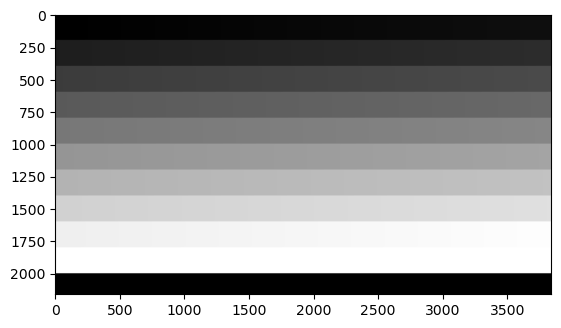

In [ ]:
plt.imshow(testtt)

/Users/justus/.local/lib/python3.9/site-packages/colour/utilities/verbose.py:262: ColourUsageWarning: "Recommendation ITU-R BT.2100" "Reference HLG OOTF" uses RGB Luminance in computations and expects a vector input, thus the given input array will be stacked to compose a vector for internal computations but a single component will be output.
  warn(*args, **kwargs)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_21831/2614979925.py:71: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_hlg_FR,sum(value_counter_image_hlg_FR)), 'k',where="mid",linewidth=1,color="darkturquoise", label="HLG EOTF 10 bit Narrow Range",alpha=0.7)


ValueError: x and y must have same first dimension, but have shapes (36,) and (19,)

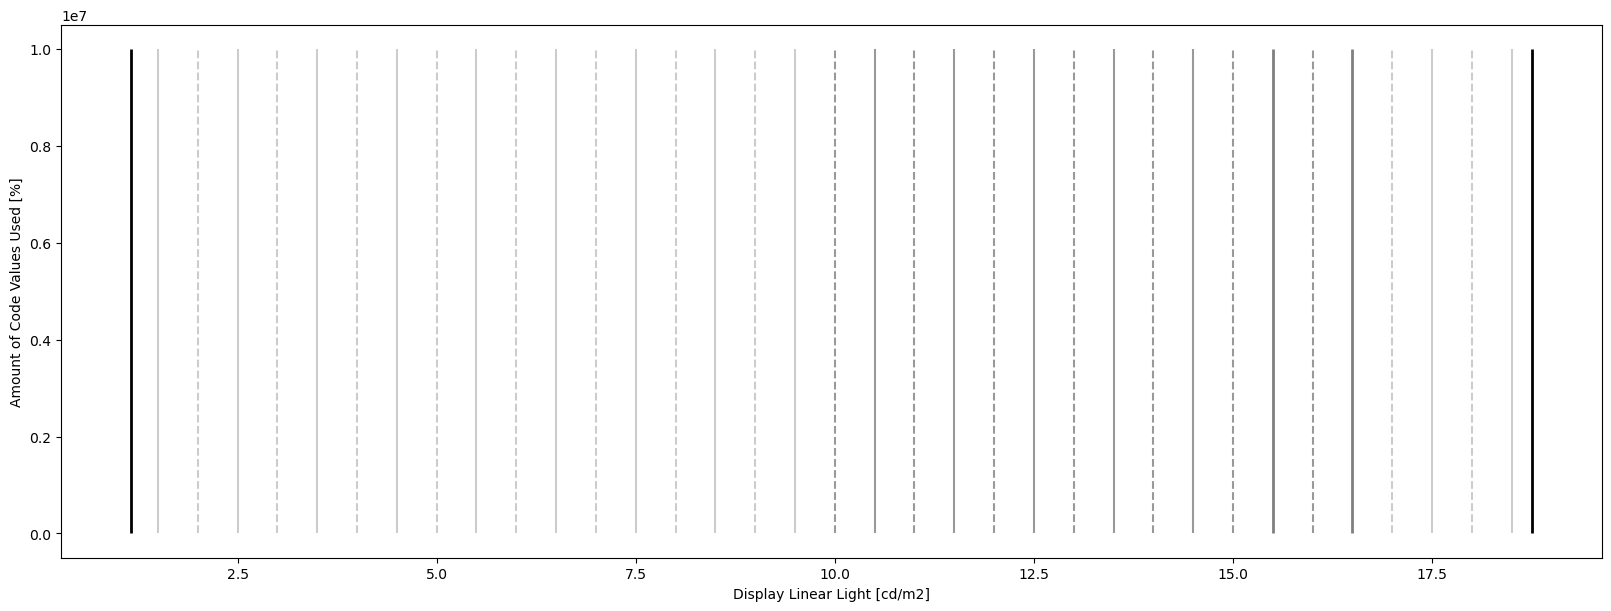

In [8]:
figR, (axL) = plt.subplots(1, 1, figsize=(16, 6), constrained_layout=True)



value_counter_image_hlg_FR = np.zeros((36))
value_counter_image_pq_FR = np.zeros((36))

axL.set_ylabel('Amount of Code Values Used [%]')
axL.set_xlabel('Display Linear Light [cd/m2]')

#x1 = np.linspace(0.000000000000001,1,1000000)

axL.vlines(0.5+2/3,0,10000000,color='black', linestyle="solid", alpha=1,linewidth=2)
axL.vlines(1.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(2.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(3.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(4.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(5.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(6.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(7.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(8.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(9.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(10.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(11.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(12.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(13.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(14.5,0,10000000,color='black', linestyle="solid", alpha=0.4)
axL.vlines(15.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL.vlines(16.5,0,10000000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axL.vlines(17.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(18.5,0,10000000,color='gray', linestyle="solid", alpha=0.4)
axL.vlines(18.5+0.25,0,10000000,color='black', linestyle="solid", alpha=1, linewidth=2)



axL.vlines(2,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(3,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(4,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(5,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(6,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(7,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(8,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(9,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(10,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(11,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(12,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(13,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(14,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(15,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(16,0,10000000,color='black', linestyle="dashed", alpha=0.4)
axL.vlines(17,0,10000000,color='gray', linestyle="dashed", alpha=0.4)
axL.vlines(18,0,10000000,color='gray', linestyle="dashed", alpha=0.4)


#value_counter_image_luma = split_array_to_stops(axI_Display_Linear_Line_Luma[:,0])
value_counter_image_hlg_FR = split_array_to_stops(c.models.eotf_HLG_BT2100(legal2full(np.linspace(64,940,877)),0,1000))
value_counter_image_pq_FR = split_array_to_stops(c.models.eotf_ST2084(legal2full(np.linspace(64,940,877))))

#print(value_counter_image_luma)

bars = ('A', 'B', 'C', 'D', 'E',
    'F','G', 'H', 'I', 'J', 
    'K','L','M', 'N', 'O', 
    'P', 'Q','R','A', 'B', 
    'C', 'D', 'E','F','G', 
    'H', 'I', 'J', 'K','L',
    'M', 'N', 'O', 'P', 'Q' , 'R')

y_pos = np.arange(len(bars))

axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_hlg_FR,sum(value_counter_image_hlg_FR)), 'k',where="mid",linewidth=1,color="darkturquoise", label="HLG EOTF 10 bit Narrow Range",alpha=0.7)
axL.step(y_pos/2 + 1.25, np.divide(value_counter_image_pq_FR,sum(value_counter_image_pq_FR)), 'k',where="mid",linewidth=1,color="darkgreen", label="PQ EOTF 10 bit Narrow Range",alpha=0.7)

#axL.bar(y_pos[1:35]/2 + 0.15 + (0.1) + 1, np.divide(value_counter_image_luma[1:35],sum(value_counter_image_luma)), color="black", width=0.3, alpha=0.3, label="Image Display Linear Light Luma")
#axL.bar(y_pos[0:1]/2 + 0.15 + (0.1) + 1 + 0.1, np.divide(value_counter_image_luma[0:1],sum(value_counter_image_luma)), color="black", width=0.1, alpha=0.3)
#axL.bar(y_pos[35:36]/2 + 0.15 + (0.1) + 1 - 0.125, np.divide(value_counter_image_luma[35:36],sum(value_counter_image_luma)), color="black", width=0.1, alpha=0.3)

#axL.bar(y_pos/2 + 1.25, np.divide(value_counter_image_hlg_FR,sum(value_counter_image_hlg_FR)), color="black", width=0.5, alpha=0.3, label="HLG EOTF 10 bit Narrow Range")
#axL.bar(y_pos/2 + 1.25, np.divide(value_counter_image_hlg_FR,sum(value_counter_image_pq_FR)), color="black", width=0.5, alpha=0.3, label="PQ EOTF 10 bit Narrow Range")

y_pos_between = np.round([200 * 2 ** i for i in range(-15,3)],3)
y_pos_neu = np.linspace(0,17,18)

axL.set_xticks(y_pos_neu+1.5, y_pos_between)

axL.set_xlim(0.5,19.5)
axL.set_yscale("log")
axL.set_ylim(0.0001,1)
axL.set_yticks([0.0001,0.001,0.01,0.1,1],[0.01,0.1,1,10,100])


In [38]:
#@njit
def values_lower_minus_11(array):
    index = (array[:] < 0.006103515625)
    return array[index]

#@njit
def values_minus_11_to_10_5(array):
    index = (0.006103515625 <= array[:,]) & (array[:] < 0.0091552734375)
    return array[index]

#@njit
def values_minus_10_5_to_10(array):
    index = (0.0091552734375 <= array[:,]) & (array[:] < 0.01220703125)
    return array[index]

#@njit
def values_minus_10_to_9_5(array):
    index = (0.01220703125 <= array[:,]) & (array[:] < 0.018310546875)
    return array[index]

#@njit
def values_minus_9_5_to_9(array):
    index = (0.018310546875 <= array[:]) & (array[:] < 0.0244140625)
    return array[index]

#@njit
def values_minus_9_to_8_5(array):
    index = (0.0244140625 <= array[:]) & (array[:] < 0.03662109375)
    return array[index]

#@njit
def values_minus_8_5_to_8(array):
    index = (0.03662109375 <= array[:]) & (array[:] < 0.048828125)
    return array[index]

#@njit
def values_minus_8_to_7_5(array):
    index = (0.048828125 <= array[:]) & (array[:] < 0.0732421875)
    return array[index]

#@njit
def values_minus_7_5_to_7(array):
    index = (0.0732421875 <= array[:]) & (array[:] < 0.09765625)
    return array[index]

#@njit
def values_minus_7_to_6_5(array):
    index = (0.09765625 <= array[:]) & (array[:] < 0.146484375)
    return array[index]

#@njit
def values_minus_6_5_to_6(array):
    index = (0.146484375 <= array[:]) & (array[:] < 0.1953125)
    return array[index]

#@njit
def values_minus_6_to_5_5(array):
    index = (0.1953125 <= array[:]) & (array[:] < 0.29296875)
    return array[index]

#@njit
def values_minus_5_5_to_5(array):
    index = (0.29296875 <= array[:]) & (array[:] < 0.390625)
    return array[index]

#@njit
def values_minus_5_to_4_5(array):
    index = (0.390625 <= array[:]) & (array[:] < 0.5859375)
    return array[index]

#@njit
def values_minus_4_5_to_4(array):
    index = (0.5859375 <= array[:]) & (array[:] < 0.78125)
    return array[index]

#@njit
def values_minus_4_to_3_5(array):
    index = (0.78125 <= array[:]) & (array[:] < 1.171875)
    return array[index]

#@njit
def values_minus_3_5_to_3(array):
    index = (1.171875 <= array[:]) & (array[:] < 1.5625)
    return array[index]

#@njit
def values_minus_3_to_2_5(array):
    index = (1.5625 <= array[:]) & (array[:] < 2.34375)
    return array[index]

#@njit
def values_minus_2_5_to_2(array):
    index = (2.34375 <= array[:]) & (array[:] < 3.125)
    return array[index]

#@njit
def values_minus_2_to_1_5(array):
    index = (3.125 <= array[:]) & (array[:] < 4.6875)
    return array[index]

#@njit
def values_minus_1_5_to_1(array):
    index = (4.6875 <= array[:]) & (array[:] < 6.25)
    return array[index]

#@njit
def values_minus_1_to_0_5(array):
    index = (6.25 <= array[:]) & (array[:] < 9.375)
    return array[index]

#@njit
def values_minus_0_5_to_0(array):
    index = (9.375 <= array[:]) & (array[:] < 12.5)
    return array[index]

#@njit
def values_plus_0_to_0_5(array):
    index = (12.5 <= array[:]) & (array[:] < 18.75)
    return array[index]

#@njit
def values_plus_0_5_to_1(array):
    index = (18.75 <= array[:]) & (array[:] < 25)
    return array[index]

#@njit
def values_plus_1_to_1_5(array):
    index = (25 <= array[:]) & (array[:] < 37.5)
    return array[index]

#@njit
def values_plus_1_5_to_2(array):
    index = (37.5 <= array[:]) & (array[:] < 50)
    return array[index]

#@njit
def values_plus_2_to_2_5(array):
    index = (50 <= array[:]) & (array[:] < 75)
    return array[index]

#@njit
def values_plus_2_5_to_3(array):
    index = (75 <= array[:]) & (array[:] < 100)
    return array[index]

#@njit
def values_plus_3_to_3_5(array):
    index = (100 <= array[:]) & (array[:] < 150)
    return array[index]

#@njit
def values_plus_3_5_to_4(array):
    index = (150 <= array[:]) & (array[:] < 200)
    return array[index]

#@njit
def values_plus_4_to_4_5(array):
    index = (200 <= array[:]) & (array[:] < 300)
    return array[index]

#@njit
def values_plus_4_5_to_5(array):
    index = (300 <= array[:]) & (array[:] < 400)
    return array[index]

#@njit
def values_plus_5_to_5_5(array):
    index = (400 <= array[:]) & (array[:] < 600)
    return array[index]

#@njit
def values_plus_5_5_to_6(array):
    index = (600 <= array[:]) & (array[:] < 800)
    return array[index]

#@njit
def values_over_6(array):
    index = (800 <= array[:])
    return array[index]

In [4]:
#@njit
def values_lower_minus_11(array):
    index = (array[:] < 0.006103515625)
    return array[index]

#@njit
def values_minus_11_to_10_5(array):
    index = (0.006103515625 <= array[:,]) & (array[:] < 0.01220703125)
    return array[index]

#@njit
def values_minus_10_to_9_5(array):
    index = (0.01220703125 <= array[:,]) & (array[:] < 0.0244140625)
    return array[index]

#@njit
def values_minus_9_to_8_5(array):
    index = (0.0244140625 <= array[:]) & (array[:] < 0.048828125)
    return array[index]

#@njit
def values_minus_8_to_7_5(array):
    index = (0.048828125 <= array[:]) & (array[:] < 0.09765625)
    return array[index]

#@njit
def values_minus_7_to_6_5(array):
    index = (0.09765625 <= array[:]) & (array[:] < 0.1953125)
    return array[index]

#@njit
def values_minus_6_to_5_5(array):
    index = (0.1953125 <= array[:]) & (array[:] < 0.390625)
    return array[index]

#@njit
def values_minus_5_to_4_5(array):
    index = (0.390625 <= array[:]) & (array[:] < 0.78125)
    return array[index]

#@njit
def values_minus_4_to_3_5(array):
    index = (0.78125 <= array[:]) & (array[:] < 1.5625)
    return array[index]

#@njit
def values_minus_3_to_2_5(array):
    index = (1.5625 <= array[:]) & (array[:] < 3.125)
    return array[index]

#@njit
def values_minus_2_to_1_5(array):
    index = (3.125 <= array[:]) & (array[:] < 6.25)
    return array[index]

#@njit
def values_minus_1_to_0_5(array):
    index = (6.25 <= array[:]) & (array[:] < 12.5)
    return array[index]

#@njit
def values_plus_0_to_0_5(array):
    index = (12.5 <= array[:]) & (array[:] < 25)
    return array[index]

#@njit
def values_plus_1_to_1_5(array):
    index = (25 <= array[:]) & (array[:] < 50)
    return array[index]

#@njit
def values_plus_2_to_2_5(array):
    index = (50 <= array[:]) & (array[:] < 100)
    return array[index]

#@njit
def values_plus_3_to_3_5(array):
    index = (100 <= array[:]) & (array[:] < 200)
    return array[index]

#@njit
def values_plus_4_to_4_5(array):
    index = (200 <= array[:]) & (array[:] < 400)
    return array[index]

#@njit
def values_plus_5_to_5_5(array):
    index = (400 <= array[:]) & (array[:] < 800)
    return array[index]

#@njit
def values_over_6(array):
    index = (800 <= array[:])
    return array[index]

In [5]:
## Log C4 Encoding


def split_array_to_stops(input):

    value_counter_image = np.zeros((36))

    global_values = input
    
    value_counter_image = [len(values_lower_minus_11(global_values)), 
                           len(values_minus_11_to_10_5(global_values)),
                           len(values_minus_10_to_9_5(global_values)),
                           len(values_minus_9_to_8_5(global_values)),
                           len(values_minus_8_to_7_5(global_values)),
                           len(values_minus_7_to_6_5(global_values)),
                           len(values_minus_6_to_5_5(global_values)),
                           len(values_minus_5_to_4_5(global_values)),
                           len(values_minus_4_to_3_5(global_values)),
                           len(values_minus_3_to_2_5(global_values)),
                           len(values_minus_2_to_1_5(global_values)),
                           len(values_minus_1_to_0_5(global_values)),
                           len(values_plus_0_to_0_5(global_values)),
                           len(values_plus_1_to_1_5(global_values)),
                           len(values_plus_2_to_2_5(global_values)),
                           len(values_plus_3_to_3_5(global_values)),
                           len(values_plus_4_to_4_5(global_values)),
                           len(values_plus_5_to_5_5(global_values)),
                           len(values_over_6(global_values))]
                           
    return value_counter_image

def image_analysis(file):

    axI_Scene_Linear = file

    axI_Scene_Linear_Line_r = axI_Scene_Linear[:,:,0].reshape(-1, 1) * 100
    axI_Scene_Linear_Line_g = axI_Scene_Linear[:,:,1].reshape(-1, 1) * 100
    axI_Scene_Linear_Line_b = axI_Scene_Linear[:,:,2].reshape(-1, 1) * 100

    value_counter_image_r = split_array_to_stops(axI_Scene_Linear_Line_r[:,0])
    value_counter_image_g = split_array_to_stops(axI_Scene_Linear_Line_g[:,0])
    value_counter_image_b = split_array_to_stops(axI_Scene_Linear_Line_b[:,0])

    return np.dstack((value_counter_image_r,value_counter_image_g,value_counter_image_b))


In [39]:
## Log C4 Encoding


def split_array_to_stops(input):

    value_counter_image = np.zeros((36))

    global_values = input
    
    value_counter_image = [len(values_lower_minus_11(global_values)), 
                           len(values_minus_11_to_10_5(global_values)),
                           len(values_minus_10_5_to_10(global_values)),
                           len(values_minus_10_to_9_5(global_values)),
                           len(values_minus_9_5_to_9(global_values)),
                           len(values_minus_9_to_8_5(global_values)),
                           len(values_minus_8_5_to_8(global_values)),
                           len(values_minus_8_to_7_5(global_values)),
                           len(values_minus_7_5_to_7(global_values)),
                           len(values_minus_7_to_6_5(global_values)),
                           len(values_minus_6_5_to_6(global_values)),
                           len(values_minus_6_to_5_5(global_values)),
                           len(values_minus_5_5_to_5(global_values)),
                           len(values_minus_5_to_4_5(global_values)),
                           len(values_minus_4_5_to_4(global_values)),
                           len(values_minus_4_to_3_5(global_values)),
                           len(values_minus_3_5_to_3(global_values)),
                           len(values_minus_3_to_2_5(global_values)),
                           len(values_minus_2_5_to_2(global_values)),
                           len(values_minus_2_to_1_5(global_values)),
                           len(values_minus_1_5_to_1(global_values)),
                           len(values_minus_1_to_0_5(global_values)),
                           len(values_minus_0_5_to_0(global_values)),
                           len(values_plus_0_to_0_5(global_values)),
                           len(values_plus_0_5_to_1(global_values)),
                           len(values_plus_1_to_1_5(global_values)),
                           len(values_plus_1_5_to_2(global_values)),
                           len(values_plus_2_to_2_5(global_values)),
                           len(values_plus_2_5_to_3(global_values)),
                           len(values_plus_3_to_3_5(global_values)),
                           len(values_plus_3_5_to_4(global_values)),
                           len(values_plus_4_to_4_5(global_values)),
                           len(values_plus_4_5_to_5(global_values)),
                           len(values_plus_5_to_5_5(global_values)),
                           len(values_plus_5_5_to_6(global_values)),
                           len(values_over_6(global_values))]
                           
    return value_counter_image

def image_analysis(file):

    axI_Scene_Linear = file

    axI_Scene_Linear_Line_r = axI_Scene_Linear[:,:,0].reshape(-1, 1) * 100
    axI_Scene_Linear_Line_g = axI_Scene_Linear[:,:,1].reshape(-1, 1) * 100
    axI_Scene_Linear_Line_b = axI_Scene_Linear[:,:,2].reshape(-1, 1) * 100

    value_counter_image_r = split_array_to_stops(axI_Scene_Linear_Line_r[:,0])
    value_counter_image_g = split_array_to_stops(axI_Scene_Linear_Line_g[:,0])
    value_counter_image_b = split_array_to_stops(axI_Scene_Linear_Line_b[:,0])

    return np.dstack((value_counter_image_r,value_counter_image_g,value_counter_image_b))


In [7]:

## Linear to sRGB
def lin2srgb (x):
    result = (x <= 0.0031308) * np.multiply(x,12.92) + (x > 0.0031308) * np.subtract(np.multiply(1.055,np.power(x,(1/2.4))),0.055)
    return result


## sRGB to Linear 
def srgb2lin (x):
    result = (x <= 0.04045) * np.divide(x,12.92) + (x > 0.04045) * np.power(np.divide(np.add(x,0.055),1.055),2.4)
    return result

# SDR Formulas

## Input Luminance between 0-1
## Output Videosignal
def oetf709(x): 
    return np.subtract(np.multiply(np.power(x, 0.45), 1.099), 0.099)*(0.018<= x) + np.multiply(4.5, x) * (x <0.018)

def eotf1886(x, Lw = 100, Lb = 0): 
    gamma = 2.4
    a = np.power(np.subtract(np.power(Lw, np.divide(1,gamma)),np.power(Lb, np.divide(1, gamma))), gamma)
    b = np.divide(np.power(Lb, np.divide(1,gamma)) , np.subtract(np.power(Lw , np.divide(1,gamma)), np.power( Lb , np.divide(1, gamma))))
    return np.multiply(a , np.power( np.maximum(np.add(x, b), 0) , gamma))

def eotf1886_CRT(x, Lw = 100, Lb = 0, b = 0): 
    Vc = 0.35
    a1 = 2.6
    a2 = 3.0
    k = np.subtract(Lw,np.power(np.add(1,b),a1))
    return (x < Vc) * np.multiply(np.multiply(k,np.power(np.add(Vc,b),np.subtract(a1,a2))),np.power(np.add(x,b),a2)) + (Vc <= x) * np.multiply(k,np.power(np.add(x,b),a1))

## Luma Formulas for Rec2020 / Rec709 -> Fixed Addition
def luma709(img): 
    return np.multiply(img[:,:,0],0.2126) + np.multiply(img[:,:,1],0.7152) + np.multiply(img[:,:,2],0.0722)
def luma2020(img): 
    return np.multiply(img[:,:,0],0.2627) + np.multiply(img[:,:,1],0.6780) + np.multiply(img[:,:,2],0.0593)

## Formulas for PQ

# increasing rec.709 formulas 
def steroids709(x): 
    return np.subtract(np.multiply(np.power(np.multiply(59.5208 , x), 0.45), 1.099), 0.099)*(0.0003024< x) + np.multiply(267.84, x) * (x <= 0.0003024)

def steroids1886(x): 
    return np.multiply(100, np.power(x, 2.4))


## Transportfunctions

def pq_eotf(x): 
    ##m1
    m1 = np.divide(2610, 16384) ## 2^14 = 16384
    m2 = np.multiply(np.divide(2523, 4096), 128) ##2^12 = 4096 , 2^7 = 128 -> Jan fragen
    c1 = np.divide(3424, 4096)
    c2 = np.multiply(np.divide(2413, 4096), 32)
    c3 = np.multiply(np.divide(2392, 4096), 32)

    
    return np.multiply(np.power(np.divide(np.maximum( np.subtract( np.power(x , np.divide(1 , m2)), c1) , 0) , np.subtract(c2, np.multiply(c3 , np.power(x , np.divide(1 , m2))))) , np.divide(1, m1)), 10000)

## Inverse_eotf

def pq_eotf_inv(x): 
    m1 = np.divide(2610, 16384) ## 2^14 = 16384
    m2 = np.multiply(np.divide(2523, 4096), 128) ##2^12 = 4096 , 2^7 = 128 -> Jan fragen
    c1 = np.divide(3424, 4096)
    c2 = np.multiply(np.divide(2413, 4096), 32)
    c3 = np.multiply(np.divide(2392, 4096), 32)

    y = np.divide(x , 10000) ## Normalisierung auf 0.00 bis 1.0

    return np.power( np.divide(np.add(c1 , np.multiply(c2 , np.power(y , m1))), np.add(1 , np.multiply(c3 , np.power(y , m1)))), m2)

# RGB Input
def hlg_oetf(x): 
    a = 0.17883277
    b = np.subtract(1 , np.multiply(4 , a))
    c = np.subtract(0.5 , np.multiply(a , np.log(np.multiply(4 , a))))

    return np.where(x <= np.divide(1,12), np.sqrt(np.multiply(3,x )), np.add( np.multiply(a , np.log(np.subtract( np.multiply(12 , x ), b))) , c) )

def hlg_oetf_inv(x):
    a = 0.17883277
    b = np.subtract(1 , np.multiply(4 , a))
    c = np.subtract(0.5 , np.multiply(a , np.log(np.multiply(4 , a))))
    
    return np.where(x <= 0.5 , np.divide( np.power(x,2), 3), np.divide(np.add(np.exp(np.divide(np.subtract(x , c), a)), b) , 12) )

## Lw = Usergain, nominal peak Luminance of the display (achromatic)
def hlg_ootf(x, Lw): 
    r = x[: , : , 0]
    g = x[: , : , 1]
    b = x[: , : , 2]
    luma = np.add(np.multiply(0.2627 ,r ), np.multiply(0.678 , g), np.multiply(0.0593 , b))
    alpha = Lw
    gamma = np.add(1.2, np.multiply(0.42 , np.log10(np.divide(Lw,1000))))
    rd = np.multiply( alpha , np.power(luma , np.subtract(gamma , 1)), r)
    gd = np.multiply( alpha , np.power(luma , np.subtract(gamma , 1)), g)
    bd = np.multiply( alpha , np.power(luma , np.subtract(gamma , 1)), b)
    return np.stack((rd , gd , bd))

## Lw = Usergain, nominal peak Luminance of the display (achromatic)
def hlg_ootf_bw(x, Lw=1000): 
    alpha = Lw
    gamma = np.add(1.2, np.multiply(0.42 , np.log10(np.divide(Lw,1000))))
    return np.multiply(np.multiply( alpha , np.power(x , np.subtract(gamma , 1))),x)

def hlg_eotf(x, Lw = 1000, Lb = 0.005):
    gamma = np.add(1.2, np.multiply(0.42 , np.log10(np.divide(Lw,1000))))
    beta = np.sqrt(np.multiply(3 , np.power(np.divide(Lb , Lw), np.divide(1,gamma))))
    return hlg_ootf_bw(hlg_oetf_inv(np.maximum(0 , (np.add( np.multiply( np.subtract(1 , beta), x ), beta)))), Lw)


def slog3oetf(x): 
    # reflection add
    #vx = x*0.9

    return (x < 0.01125)* np.divide( np.add( np.multiply(x , np.divide(np.subtract(171.2102946929, 95), 0.01125)), 95), 1023) + (x >= 0.01125)* np.divide(np.add(420 , np.multiply( np.log10(np.divide(np.add(x,0.01), np.add(0.18, 0.01))), 261.5)), 1023)

def slog3eotf(x): 
    return (x >= np.divide(171.2102946929,1023)) * np.subtract( np.multiply(np.power(10 , np.divide( np.subtract(420 , np.multiply(x , 1023)) , 261.5)) , np.add(0.18 , 0.01)) , 0.01) + (x < np.divide(171.2102946929,1023)) * np.multiply(np.subtract(np.multiply(x , 1023), 95 ) , np.divide(0.01125 , np.subtract(171.2102946929 , 95)))

# These are the ARRI LogCv3 Formulas
def lin2logc(x):
    return np.multiply(x > 0.010591, 0.24719 * np.log10(5.555556 * x + 0.052272) + 0.385537) + np.multiply(x <= 0.010591, 5.367655 * x + 0.092809)
def logc2lin(x):
    return np.multiply(x > 0.149659, (np.power(10.0, (x - 0.385537) / 0.247189) - 0.052272) / 5.555556) + np.multiply(x <= 0.149659, (x - 0.092809) / 5.367650)

### LOG C4
def Encoding_LogC4(x):
    a = (np.power(2.0, 18.0) - 16.0) / 117.45
    b = (1023.0 - 95.0) / 1023.0
    c = 95.0 / 1023.0
    s = (7 * np.log(2) * np.power(2.0, 7 - 14 * c / b)) / (a * b)
    t = (np.power(2.0, 14.0 * (-c / b) + 6.0) - 64.0) / a
    return (x < t) * np.divide(np.subtract(x,t),s) + (x >= t) * np.add(np.multiply(np.divide( np.subtract(np.log2(np.add(np.multiply(a,x),64.0)),6.0),14.0),b),c)

def Decoding_LogC4(x):
    a = (np.power(2.0, 18.0) - 16.0) / 117.45
    b = (1023.0 - 95.0) / 1023.0
    c = 95.0 / 1023.0
    s = (7 * np.log(2) * np.power(2.0, 7 - 14 * c / b)) / (a * b)
    t = (np.power(2.0, 14.0 * (-c / b) + 6.0) - 64.0) / a
    return (x < 0.0) * np.add(np.multiply(x,s),t) + (x >= 0.0) * np.divide(np.subtract(np.power(2.0, np.add(np.multiply(14,np.divide(np.subtract(x,c),b)),6)),64.0),a)


def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x)

def Blenden_Differenz(num1, num2):
    new2 = num2 / num1
    return np.log2(new2)

def mse_calculation(imageA, imageB):
    # Expects Luma Images
	err = np.mean(np.square(np.subtract(imageA,imageB)))
	return err

In [ ]:
import os
from fnmatch import fnmatch
from matplotlib.patches import Rectangle
import re

value_counter_image_hlg_FR = split_array_to_stops(c.models.eotf_HLG_BT2100(legal2full(np.linspace(64,940,877)),0,1000))
value_counter_image_pq_FR = split_array_to_stops(c.models.eotf_ST2084(legal2full(np.linspace(64,940,877))))

/Users/justus/.local/lib/python3.9/site-packages/colour/utilities/verbose.py:262: ColourUsageWarning: "Recommendation ITU-R BT.2100" "Reference HLG OOTF" uses RGB Luminance in computations and expects a vector input, thus the given input array will be stacked to compose a vector for internal computations but a single component will be output.
  warn(*args, **kwargs)


In [ ]:
print(value_counter_image_hlg_FR)